# CarroYA

Notebook to explore and crear EDA to the cars detail data

## Sección 1. Calidad de Datos

In [1]:
import importlib
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from functions_data import * 
from definitions import *

print("============ START ===================")
missing_columns_check = ['id','precio','km','año']

schema = {  'id':'string',
            'link':'string',
            'modelo':'category',
            'version':'string',
            'precio':'double',
            'ciudad':'category',
            'km':'double',
            'año':'int',
            'estado':'category',
            'ubicacion':'category',
            'placa':'category',
            'tipo_de_caja':'category',
            'combustible':'category',
            'cilindraje':'double',
            'color':'category',
            'puertas':'double',
            'airbags':'category',
            'direccion':'category',
}


csv_file = f'../data/car_details_163_mazda.csv'
df = pd.read_csv(f'{csv_file}')
df = clean_dataframe(df, schema, missing_columns_check)
# create new variables
df['marca'] = df['modelo'].apply(lambda x : str(x).split(' ')[0])
df['placa'] = df['placa'].apply(lambda x : str(x).split(' ')[0])
year_today = 2024
df['age'] = df['año'].apply(lambda x :  year_today-int(x) )
df['age'] = df['age'].apply(lambda x :  0 if x < 0 else x )

#Elegir solo carros usados
df = df.query('estado == "usado"')

# Corregir algunas valores de las variables categoricas
df['color'] = df['color'].str.replace('morado','otro').str.replace('lila','otro').str.replace('no disponible','otro').str.replace('varios','otro')
df['combustible'] = df['combustible'].str.replace('sin especificar','gasolina')
# Tipo de caja --> Automatica = 1, Mecanica = 0 
df['tipo_de_caja'] = df['tipo_de_caja'].str.replace('0','mecanica').str.replace('secuencial','automatica').str.replace('automatica','1').str.replace('mecanica','0').fillna('0')
df['airbags'] = df['airbags'].str.replace('2','airbags').str.replace('airbags','1')
df['direccion'] = df['direccion'].str.replace('electro_hidraulica','electrica').str.replace('asistencia','').str.replace(' ','').str.replace('asistida','hidraulica')
df['cilindraje'] = df['cilindraje'].apply(lambda x: round(x *10) * 100 if x >= 0 and x<10 else x)
df['version'] = df['version'].apply(lambda x: str(x).lower())
df['modelo'] = df['modelo'].apply(lambda x: str(x).lower())
df['modelo'] = df['modelo'].apply(lambda x: ' '.join(x.split(' ')[1:]) if len(x.split(' ')) > 1 else x)
df['modelo'] = df['modelo'].str.replace('benz','')
df['modelo'] = df['modelo'].str.replace('3 all new','3')
df['nombre_carro'] = df['marca']+' ' + df['modelo'] + ' ' + df['version']
df['impar'] = df['placa'].apply(lambda x: int(x[-1]) % 2 if x[-1].isdigit() else -1)

print(f'df cleaned size: {df.shape} - columns: {df.columns}' )
df.head()
#df.groupby(by=['airbags']).count()['id'].sort_values(ascending=False)#.head(10)

c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


============ START ===================
df original size: (3258, 19) - columns: Index(['id', 'link', 'modelo', 'version', 'precio', 'ciudad', 'km', 'año',
       'ESTADO', 'UBICACIÓN', 'PLACA', 'TIPO DE CAJA', 'COMBUSTIBLE',
       'CILINDRAJE', 'COLOR', 'AIRBAGS', 'PUERTAS', 'DIRECCIÓN',
       'Unnamed: 18'],
      dtype='object')
df cleaned size: (3241, 18) - columns: Index(['id', 'link', 'modelo', 'version', 'precio', 'ciudad', 'km', 'año',
       'estado', 'ubicacion', 'placa', 'tipo_de_caja', 'combustible',
       'cilindraje', 'color', 'airbags', 'puertas', 'direccion'],
      dtype='object')
df cleaned size: (3241, 22) - columns: Index(['id', 'link', 'modelo', 'version', 'precio', 'ciudad', 'km', 'año',
       'estado', 'ubicacion', 'placa', 'tipo_de_caja', 'combustible',
       'cilindraje', 'color', 'airbags', 'puertas', 'direccion', 'marca',
       'age', 'nombre_carro', 'impar'],
      dtype='object')


id  \
0  4ef51f68-673b-4f9c-8f24-c235a934f5f8   
1                               2283393   
2  c33721f6-93ec-4d28-aa22-1dcaf6f7d23e   
3  2a773294-3c25-45e3-ac5d-41e2bad26f69   
4  6262440f-01a6-4f15-b688-4d1f9bb169a5   

                                                link modelo  \
0  https://www.carroya.com/detalle/usado/mazda/2/...      2   
1  https://www.carroya.com/detalle/usado/mazda/bt...  bt_50   
2  https://www.carroya.com/detalle/usado/mazda/cx...  cx_30   
3  https://www.carroya.com/detalle/usado/mazda/3/...      3   
4  https://www.carroya.com/detalle/usado/mazda/cx...  cx_30   

                                   version       precio    ciudad        km  \
0    grand touring lx 1.5 sedan automatico   86000000.0      cali   15982.0   
1   professional 3.2 4x4 automatica diesel   96900000.0    bogota  103000.0   
2     grand touring 2.0 suv automatico 4x2  102000000.0  envigado   45000.0   
3             touring 2.0 sedan automatico   60000000.0    bogota   70000.0   
4  grand touring 2.0 4x2 automática hybrid  110000000.0    bogota   32000.0   

    año estado ubicacion  ... combustible cilindraje color  airbags puertas  \
0  2024  usado      cali  ...    gasolina     1500.0  azul      NaN     NaN   
1  2014  usado    bogota  ...      diesel     3200.0  gris        1     NaN   
2  2022  usado  envigado  ...    gasolina     2000.0  gris      NaN     NaN   
3  2016  usado    bogota  ...    gasolina     2000.0  gris      NaN     NaN   
4  2023  usado    bogota  ...     hibrido       20.0  rojo      NaN     5.0   

  direccion  marca age                                       nombre_carro  \
0       NaN  mazda   0      mazda 2 grand touring lx 1.5 sedan automatico   
1       NaN  mazda  10  mazda bt_50 professional 3.2 4x4 automatica di...   
2       NaN  mazda   2   mazda cx_30 grand touring 2.0 suv automatico 4x2   
3       NaN  mazda   8               mazda 3 touring 2.0 sedan automatico   
4       NaN  mazda   1  mazda cx_30 grand touring 2.0 4x2 automática h...   

   impar  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 22 columns]

In [2]:
df.groupby(by=['modelo']).count()['id'].sort_values(ascending=False).head(10)

modelo
3          1016
2           686
cx_5        452
cx_30       291
6           125
bt_50        93
626          89
allegro      87
323          83
cx_3         75
Name: id, dtype: int64

In [3]:
num_modelos = 10
carros_top = df.groupby(by=['modelo']).count()['id'].sort_values(ascending=False).head(num_modelos).sum()
print(f'carros_top {num_modelos}: {carros_top} - total: {df.shape[0]}')
# porcentaje de reducción datos seleccionando top 10 de marcas
print(f'Perdida de datos: {(1-carros_top/df.shape[0]) *100:.2f} %')

carros_top 10: 2997 - total: 3241
Perdida de datos: 7.53 %


In [4]:
# Procentaje de nulos
df.isna().sum()/df.shape[0] *100

id               0.000000
link             0.000000
modelo           0.000000
version          0.000000
precio           0.000000
ciudad           0.000000
km               0.000000
año              0.000000
estado           0.000000
ubicacion        0.000000
placa            0.000000
tipo_de_caja     0.000000
combustible      0.030855
cilindraje       0.000000
color            0.000000
airbags         96.821969
puertas         71.737118
direccion       97.871027
marca            0.000000
age              0.000000
nombre_carro     0.000000
impar            0.000000
dtype: float64

In [5]:
# Ajustes segun el análisis de los datos

# Eliminar columnas con muchos nulos
df = df.drop(columns=['puertas','airbags','direccion'],errors='ignore')

# Transformar variables categoricas a numericas
df['tipo_de_caja'] = df['tipo_de_caja'].astype('category').cat.codes #1:mecanica, 0:automatica

# Eliminar columnas con la misma información o que no tiene información útil
df = df.drop(columns=['ubicacion','estado','año','placa','link','marca','version'],errors='ignore')
#df['modelo'] = df['nombre_carro']
#df = df.drop(columns=['nombre_carro'],errors='ignore')

# elimna datos de modelos menos populares casi un 7% de los datos
num_modelos = 10
top_modelos = df['modelo'].value_counts().head(num_modelos)
df = df.query(f'modelo in {list(top_modelos.index)}')
print(f'=== df (top modelos) shape: {df.shape} === ')

# volver a ajustar las variables categoricas
df['ciudad'] = df['ciudad'].astype('string').astype('category')
df['tipo_de_caja'] = df['tipo_de_caja'].astype('string').astype('category')
df['combustible'] = df['combustible'].astype('string').astype('category')
df['color'] = df['color'].astype('string').astype('category')
df['modelo'] = df['modelo'].astype('string').astype('category')

print(f'df cleaned size: {df.shape} - columns: {df.columns}' )


=== df (top modelos) shape: (2997, 12) === 
df cleaned size: (2997, 12) - columns: Index(['id', 'modelo', 'precio', 'ciudad', 'km', 'tipo_de_caja', 'combustible',
       'cilindraje', 'color', 'age', 'nombre_carro', 'impar'],
      dtype='object')


In [6]:
# Procentaje de nulos
df.isna().sum()/df.shape[0] *100

id              0.0
modelo          0.0
precio          0.0
ciudad          0.0
km              0.0
tipo_de_caja    0.0
combustible     0.0
cilindraje      0.0
color           0.0
age             0.0
nombre_carro    0.0
impar           0.0
dtype: float64

In [7]:
# Analisis de calidad de los datos con profiling
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("../quality/quality_report_carroya_clean_mazda.html")

Summarize dataset:  74%|███████▎  | 14/19 [00:00<00:00, 40.38it/s, Calculate auto correlation]   c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'azul'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.32it/s]


## Sección 2.  Análisis Exploratorio

In [8]:
# Importación de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy import stats
import pylab
import warnings
from scipy.stats import shapiro, kstest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Configuración de advertencias y opciones de pandas
warnings.filterwarnings("ignore")
sns.set(style="darkgrid", font_scale=1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
%matplotlib inline



# Creación de funciones para graficar

def analyze_distribution(df, col):
    """
    Crea una figura con dos subplots: un histograma de distribución y un boxplot.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        col (str): El nombre de la columna a analizar en el DataFrame.

    Returns:
        None: Muestra la figura interactiva.
    """
    # Crear la figura de subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Histograma de {col}", f"Distribución de {col}"))

    # Gráfico de histograma de distribución
    histogram = go.Histogram(x=df[col], nbinsx=100, marker_color='blue', opacity=0.75)
    fig.add_trace(histogram, row=1, col=1)

    # Boxplot
    boxplot = go.Box(y=df[col], boxmean=True, marker_color='green', name=f"Rango de {col}")
    fig.add_trace(boxplot, row=1, col=2)

    # Actualizar el diseño de la figura
    fig.update_layout(
        title_text=f"Análisis de {col} en Carros Usados en Colombia",
        title_font=dict(size=20, family='Black', color='black'),
        showlegend=False,
    )

    fig.update_xaxes(title_text=col, row=1, col=1)
    fig.update_yaxes(title_text="Cantidad", row=1, col=1)
    fig.update_xaxes(title_text=col, row=1, col=2)
    fig.update_yaxes(title_text=col, row=1, col=2)

    # Mostrar la figura
    fig.show()

def scatter_plot(df, cols, filter='none', value='duster', yvariable='precio'):
    """ Function to plot scatter plots for the given columns
    Args:
        df  (pd.DataFrame): DataFrame containing the data
        cols (list): List of columns to plot
        filter (str): Filter to apply to the data 
            none: No filter
            modelo: Filter by modelo
            marca: Filter by marca
        value (str): Value to filter the data
    """
    num_cols = len(cols)
    num_rows = (num_cols - 1) // 3 + 1

    fig = make_subplots(rows=num_rows, cols=3, subplot_titles=[f"{col} vs {yvariable}" for col in cols])
    
    for i, col in enumerate(cols):
        if filter == 'none':
            filtered_df = df
        elif filter == 'modelo':
            filtered_df = df[df['modelo'].str.contains(value)]
        elif filter == 'marca':
            filtered_df = df[df['marca'].str.contains(value)]
        else:
            filtered_df = df

        scatter = go.Scatter(x=filtered_df[col], y=filtered_df[yvariable], mode='markers', name=f"{col} vs {yvariable}")
        fig.add_trace(scatter, row=(i // 3) + 1, col=(i % 3) + 1)
    
    fig.update_layout(height=400 * num_rows, title_text="Scatter Plots", showlegend=False)
    for i, col in enumerate(cols):
        fig.update_xaxes(title_text=col, row=(i // 3) + 1, col=(i % 3) + 1)
        fig.update_yaxes(title_text=yvariable, row=(i // 3) + 1, col=(i % 3) + 1)
    fig.show()



def categorical_visualization(cols, df):
    # Crear la figura de subplots con 3 columnas
    fig = make_subplots(rows=1, cols=3, subplot_titles=(
        f"Distribución de {cols}", 
        f"{cols} vs Precio", 
        f"{cols} vs Precio Promedio"
    ))

    # Define la paleta de colores
    color_sequence = px.colors.qualitative.T10

    # Crear un diccionario para el mapeo de colores a categorías
    categories = df[cols].unique()
    color_map = {category: color for category, color in zip(categories, color_sequence)}

    # Conteo de categorías (Histograma)
    histogram = px.histogram(df, x=cols, color=cols, color_discrete_map=color_map)
    for trace in histogram.data:
        fig.add_trace(trace, row=1, col=1)

    # Boxplot con orden específico
    ordered_brands = df.groupby(cols)["precio"].mean().sort_values(ascending=True).index
    boxplot = px.box(df, x=cols, y="precio", category_orders={cols: ordered_brands}, color=cols, color_discrete_map=color_map)
    for trace in boxplot.data:
        fig.add_trace(trace, row=1, col=2)

    # Barplot de precios promedio ordenado
    mean_price_by_brand = df.groupby(cols)["precio"].mean().sort_values(ascending=True).reset_index()
    barplot = px.bar(mean_price_by_brand, x=cols, y="precio", color=cols, color_discrete_map=color_map)
    for trace in barplot.data:
        fig.add_trace(trace, row=1, col=3)

    # Actualizar el diseño de la figura
    fig.update_layout(
        title_text=f"Análisis de {cols}",
        title_font=dict(size=20, family='Black'),
        showlegend=False,
    )

    fig.update_xaxes(title_text=cols, row=1, col=1)
    fig.update_yaxes(title_text="Cantidad", row=1, col=1)
    fig.update_xaxes(title_text=cols, row=1, col=2)
    fig.update_yaxes(title_text="Precio", row=1, col=2)
    fig.update_xaxes(title_text=cols, row=1, col=3)
    fig.update_yaxes(title_text="Precio Promedio", row=1, col=3)

    # Mostrar la figura
    fig.show()



def plot_correlation_matrix(df):
    """
    Crea y muestra un gráfico de correlación entre las variables numéricas del DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.

    Returns:
        None: Muestra la figura interactiva.
    """
    # Seleccionar solo las columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])
    
    # Calcular la matriz de correlación
    corr_matrix = numeric_df.corr()
    
    # Definir la escala de colores personalizada en tonos azules
    blue_scale = [
        [0.0, 'rgb(0, 0, 255)'],   # Azul oscuro para -1
        [0.5, 'rgb(255, 255, 255)'], # blanco para 0
        [1.0, 'rgb(0, 0, 255)']  # Blanco para 1
    ]
    
    # Crear el heatmap de correlación
    fig = px.imshow(corr_matrix, 
                    text_auto=True, 
                    color_continuous_scale=blue_scale,
                    zmin=-1, zmax=1,
                    title="Matriz de Correlación",
                    labels=dict(color="Correlación"))
    
    # Actualizar el diseño de la figura
    fig.update_layout(
        title_font=dict(size=20, family='Black', color='black'),
        autosize=False,
        width=800,
        height=800,
        margin=dict(l=40, r=40, b=40, t=40)
    )
    
    # Mostrar la figura
    fig.show()
    

# Información general del dataset
print(f'=== df shape: {df.shape} === ')
df.info()

=== df shape: (2997, 12) === 
<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 3257
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            2997 non-null   object  
 1   modelo        2997 non-null   category
 2   precio        2997 non-null   float64 
 3   ciudad        2997 non-null   category
 4   km            2997 non-null   float64 
 5   tipo_de_caja  2997 non-null   category
 6   combustible   2997 non-null   category
 7   cilindraje    2997 non-null   float64 
 8   color         2997 non-null   category
 9   age           2997 non-null   int64   
 10  nombre_carro  2997 non-null   object  
 11  impar         2997 non-null   int64   
dtypes: category(5), float64(3), int64(2), object(2)
memory usage: 272.8+ KB


### Precio

In [9]:
analyze_distribution(df, 'precio')

In [10]:
df["precio"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min          mean      median          max           std  \
precio  4000000.0  6.808006e+07  66000000.0  163000000.0  3.371752e+07   

            skew  
precio  0.284428

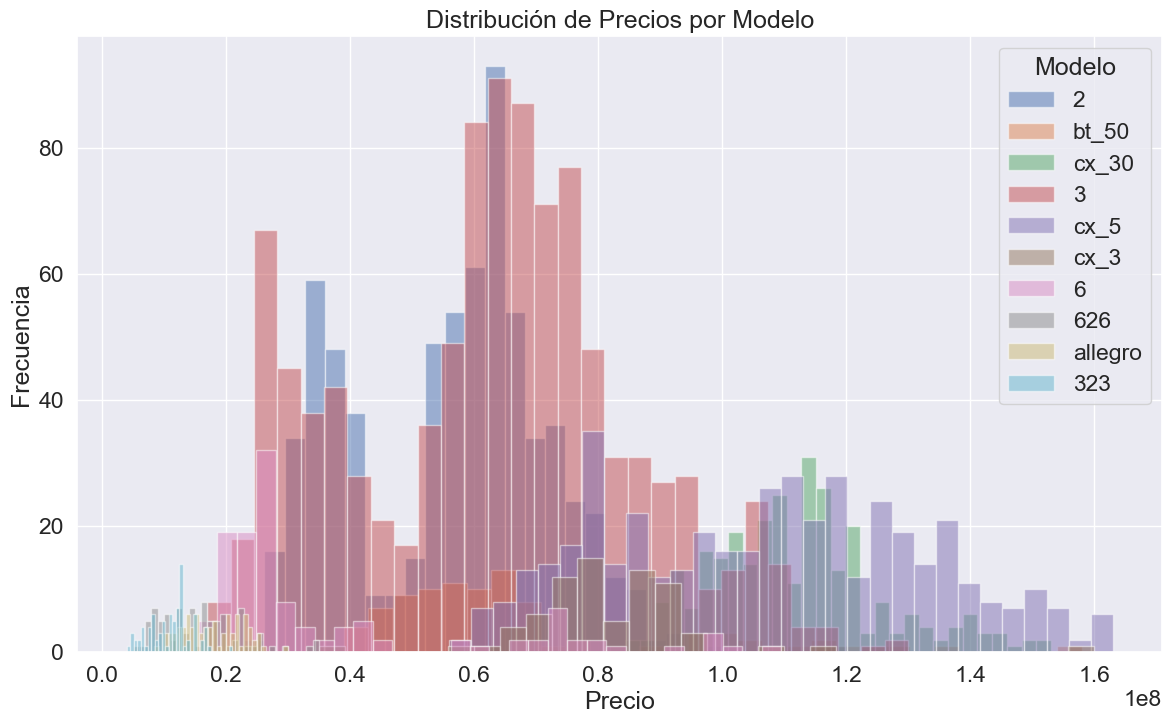

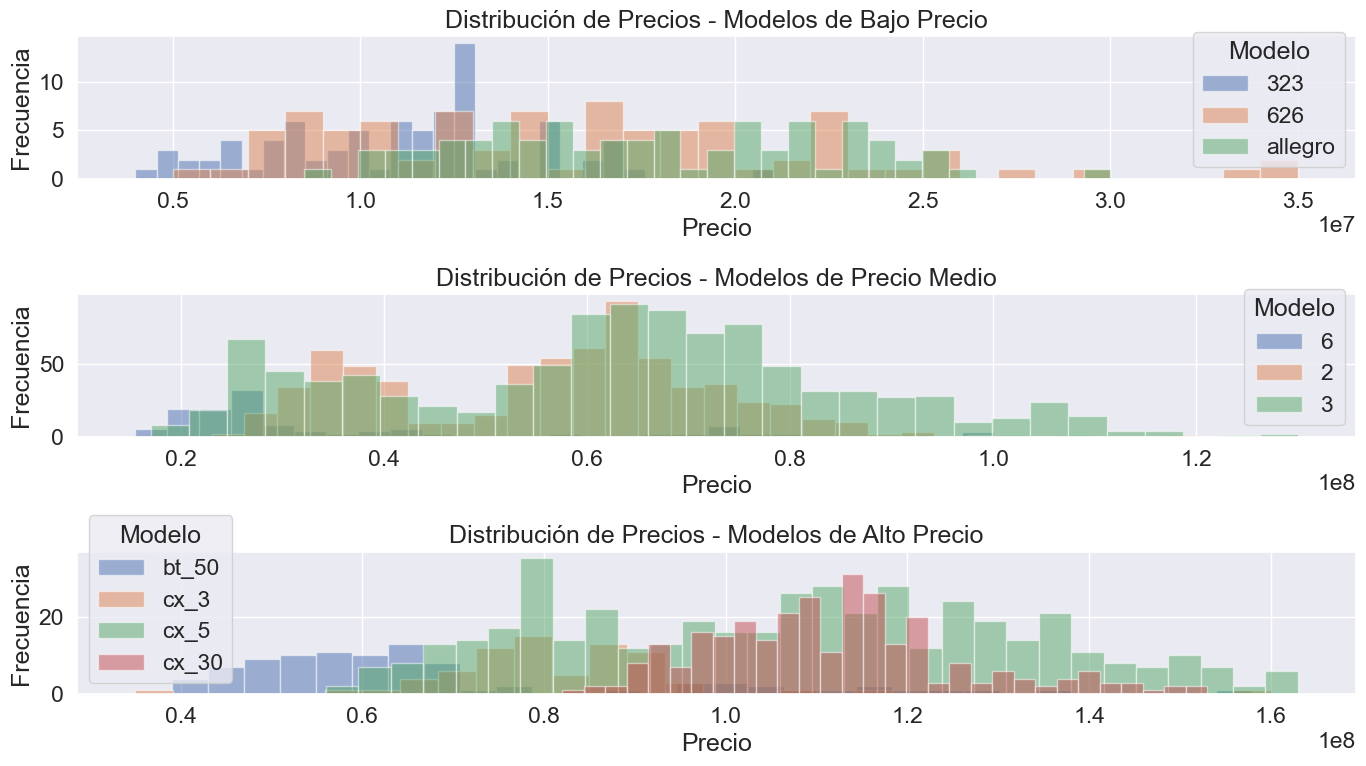

In [11]:
plt.figure(figsize=(14, 8))
unique_models = df['modelo'].unique()

for model in unique_models:
    subset = df[df['modelo'] == model]
    plt.hist(subset['precio'], bins=30, alpha=0.5, label=str(model))

plt.title('Distribución de Precios por Modelo')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend(title='Modelo')
plt.show()
# Calculate the average price for each model
average_prices = df.groupby('modelo')['precio'].mean()

# Sort models by average price
sorted_models = average_prices.sort_values().index

# Divide models into three groups based on average price
low_price_models = sorted_models[:len(sorted_models)//3]
mid_price_models = sorted_models[len(sorted_models)//3:2*len(sorted_models)//3]
high_price_models = sorted_models[2*len(sorted_models)//3:]

# Plot histograms for each group
plt.figure(figsize=(14, 8))

# Low price models
plt.subplot(3, 1, 1)
for model in low_price_models:
    subset = df[df['modelo'] == model]
    plt.hist(subset['precio'], bins=30, alpha=0.5, label=str(model))
plt.title('Distribución de Precios - Modelos de Bajo Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend(title='Modelo')

# Mid price models
plt.subplot(3, 1, 2)
for model in mid_price_models:
    subset = df[df['modelo'] == model]
    plt.hist(subset['precio'], bins=30, alpha=0.5, label=str(model))
plt.title('Distribución de Precios - Modelos de Precio Medio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend(title='Modelo')

# High price models
plt.subplot(3, 1, 3)
for model in high_price_models:
    subset = df[df['modelo'] == model]
    plt.hist(subset['precio'], bins=30, alpha=0.5, label=str(model))
plt.title('Distribución de Precios - Modelos de Alto Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend(title='Modelo')

plt.tight_layout()
plt.show()

### Kilometros

In [12]:
analyze_distribution(df, 'km')

In [13]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['km'].quantile(0.25)
Q3 = df['km'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== IQR: {IQR} - Lower Bound: {lower_bound} - Upper Bound: {upper_bound} ===")
# Filtrar los valores atípicos
df_filtered = df[(df['km'] >= lower_bound) & (df['km'] <= upper_bound)]
print(f"=== Filtered DataFrame (sin valores atípicos de Precio): {df_filtered.shape} ===")

=== IQR: 75800.0 - Lower Bound: -78200.0 - Upper Bound: 225000.0 ===
=== Filtered DataFrame (sin valores atípicos de Precio): (2869, 12) ===


In [14]:
2869/2997

0.9572906239572906

In [15]:
analyze_distribution(df_filtered, 'km')

### Modelos

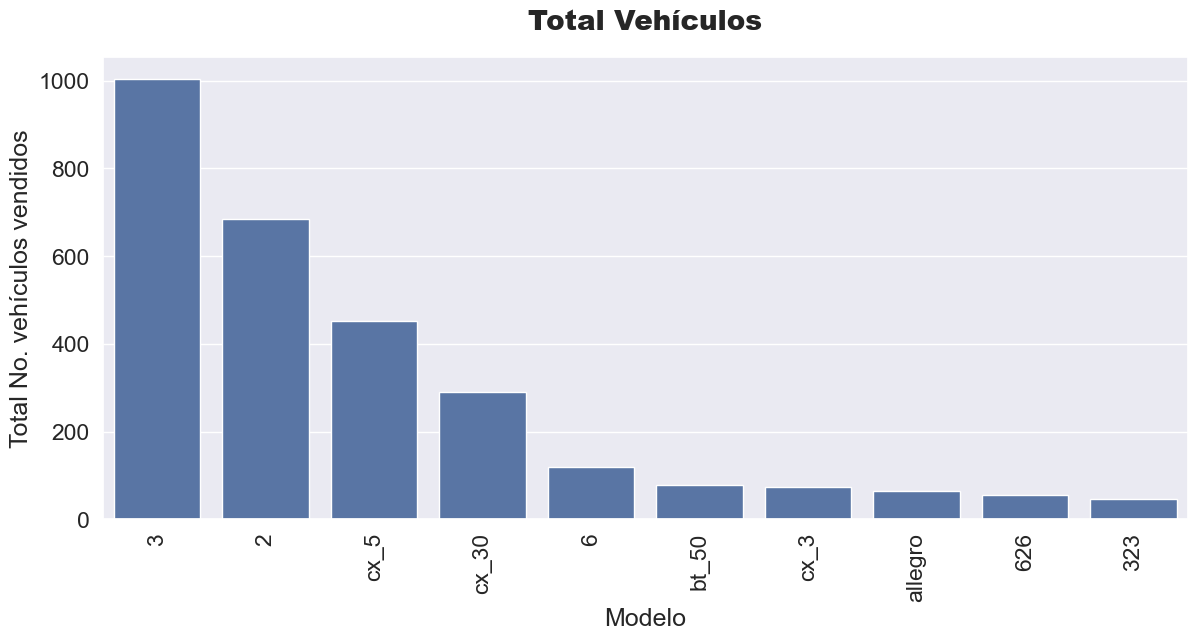

In [16]:
plt.figure(figsize=(14,6))
counts = df_filtered["modelo"].astype(str).value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Modelo")
plt.ylabel("Total No. vehículos vendidos")
plt.title("Total Vehículos", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

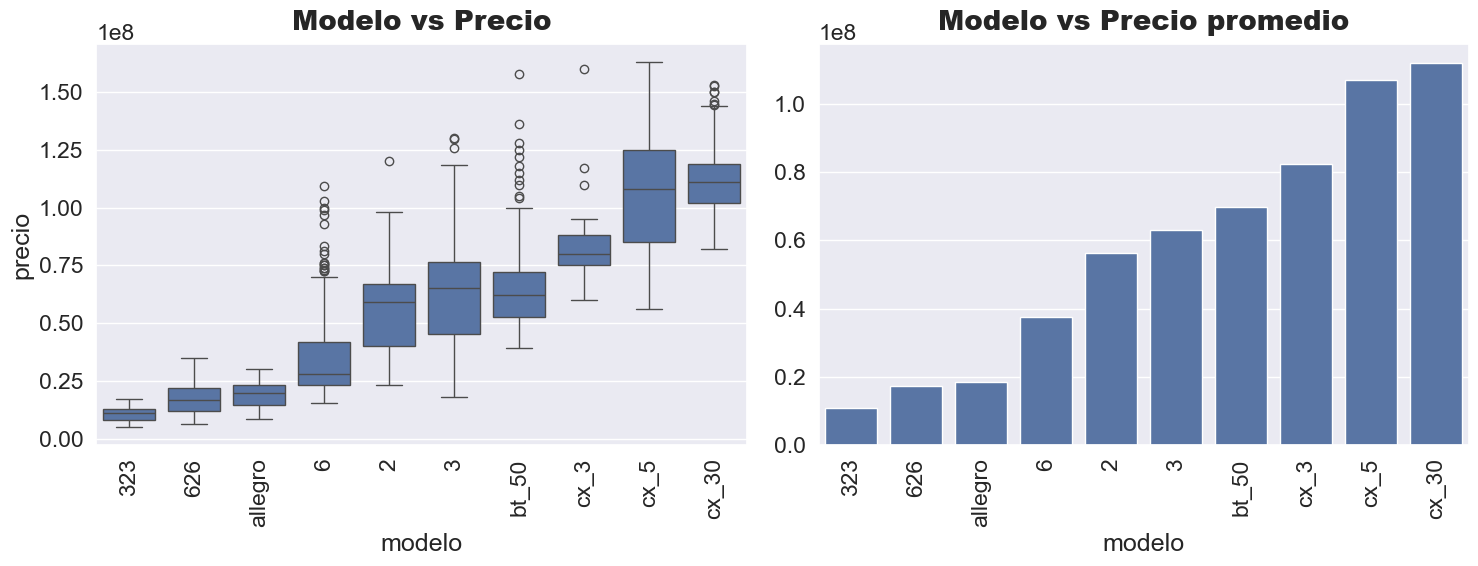

In [17]:
# Calcular el precio promedio por marca y ordenar de menor a mayor
mean_price_by_brand = df_filtered.groupby("modelo")["precio"].mean().sort_values(ascending=True)
ordered_brands = mean_price_by_brand.index

plt.figure(figsize=(15,6))

# Boxplot con orden específico
plt.subplot(1,2,1)
sns.boxplot(x="modelo", y="precio", data=df_filtered, order=ordered_brands)
plt.xticks(rotation=90)
plt.title("Modelo vs Precio", pad=10, fontweight="black", fontsize=20)

# Barplot ordenado de mejor valor promedio a mayor
plt.subplot(1,2,2)
sns.barplot(x=mean_price_by_brand.index, y=mean_price_by_brand.values, order=ordered_brands)
plt.xticks(rotation=90)
plt.title("Modelo vs Precio promedio", pad=10, fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

In [18]:
categorical_visualization("modelo", df_filtered)

### tipo de caja

In [19]:
df_filtered['tipo_de_caja']= df_filtered['tipo_de_caja'].apply(lambda x: abs(int(x)))  # --> 1:automatica, 0:mecanica
df_filtered.value_counts('tipo_de_caja')


tipo_de_caja
1    2044
0     825
Name: count, dtype: int64

In [20]:
categorical_visualization("tipo_de_caja", df_filtered)

### Combustible

In [21]:
categorical_visualization("combustible", df_filtered)

### impar


In [22]:
df_filtered['impar'] = df_filtered['impar'].apply(lambda x: abs(int(x)) )
categorical_visualization("impar", df_filtered)

### Ciudad

In [23]:
def categorize_cities(df):
    top_cities = df['ciudad'].value_counts().nlargest(4).index
    df['ciudad'] = df['ciudad'].apply(lambda x: x if x in top_cities else 'otros')
    df['ciudad'] = df['ciudad'].fillna('otros')
    df['ciudad'] = df['ciudad'].astype('string')
    return df
    
df_filtered = categorize_cities(df_filtered)

df_filtered['ciudad'].value_counts()

ciudad
bogota          1006
otros            962
cali             429
medellin         312
barranquilla     160
Name: count, dtype: Int64

In [24]:
categorical_visualization("ciudad", df_filtered)

### Color

In [25]:
def recategorize_colors(df):
    df['color'] = df['color'].apply(lambda x: x.split(' ')[0].replace('beige','blanco').replace('plateado','gris')\
                                    .replace('vinotinto','rojo').replace('dorado','otro').replace('amarillo','otro')\
                                    .replace('cafe','otro').replace('verde','otro'))
    df['color'] = df['color'].fillna('otro')
    df['color'] = df['color'].astype('string').astype('category')

    return df

df_filtered = recategorize_colors(df_filtered)
df_filtered['color'].value_counts() 

color
gris      1110
rojo       662
blanco     655
azul       191
negro      128
otro       123
Name: count, dtype: int64

In [26]:
categorical_visualization("color", df_filtered)

### Variables numéricas

In [27]:
df_filtered.columns

Index(['id', 'modelo', 'precio', 'ciudad', 'km', 'tipo_de_caja', 'combustible',
       'cilindraje', 'color', 'age', 'nombre_carro', 'impar'],
      dtype='object')

In [28]:
df_filtered['cilindraje'] = df_filtered['cilindraje'].apply(lambda x: abs(x)  if x < 0 else x)
df_filtered['cilindraje'] = df_filtered['cilindraje'].apply(lambda x: x/1000  if x > 10000 else x)
df_filtered['cilindraje'].describe()

count    2869.000000
mean     1361.144137
std       917.834878
min         0.000000
25%        25.000000
50%      1600.000000
75%      2000.000000
max      6000.000000
Name: cilindraje, dtype: float64

In [29]:
scatter_plot(df_filtered,["km","age",'cilindraje'], filter='none', value='none')

In [30]:
scatter_plot(df_filtered,["km","age",'cilindraje'], filter='modelo', value='3')

### Correlacion


In [32]:
plot_correlation_matrix(df_filtered)


# Seccion 2 Modelado

## Creación de nuevas caracteristicas

In [32]:
print(df_filtered.columns.values)

['id' 'modelo' 'precio' 'ciudad' 'km' 'tipo_de_caja' 'combustible'
 'cilindraje' 'color' 'age' 'nombre_carro' 'impar']


In [44]:
df_clean[['modelo','modelo_mean']].value_counts()

modelo   modelo_mean 
3        6.303968e+07    1003
2        5.619852e+07     685
cx_5     1.070326e+08     452
cx_30    1.119264e+08     290
6        3.755942e+07     120
bt_50    6.976567e+07      79
cx_3     8.235257e+07      74
allegro  1.862457e+07      64
626      1.722321e+07      56
323      1.102152e+07      46
Name: count, dtype: int64

In [ ]:
##
df_clean = df_filtered.copy()
z = round(df_clean.groupby(["modelo"])["precio"].agg(["mean"]),2).T
df_clean = df_clean.merge(z.T,how="left",on="modelo")
df_clean.rename(columns={"mean":"modelo_mean"},inplace=True)


# Calcular los valores de los cortes (bins) para cuartiles
quartiles = np.percentile(df_clean['modelo_mean'], [30, 75])  # 30th and 75th percentiles Check this values
print(f"=== Quartiles: {quartiles} ===")
bins = [df_clean['modelo_mean'].min()] + list(quartiles) + [df_clean['modelo_mean'].max()]
print(f"=== {len(bins)} Bins: {bins} ==="  )
cars_bin = ['baja', 'media', 'alta']
print(f"=== {len(cars_bin)} Car Bins: {cars_bin} ==="  )
df_clean['range'] = pd.cut(df_clean['modelo_mean'], bins=bins, labels=cars_bin, include_lowest=True)

print(f"=== df_clean shape: {df_clean.shape} ===")
print(df_clean['range'].value_counts()  )

# Print which models are classified in each range
for car_bin in cars_bin:
    models_in_bin = df_clean[df_clean['range'] == car_bin]['modelo'].unique()
    print(f"Models in {car_bin} range: {models_in_bin}")

print(df_clean.columns.values)

categorical_visualization("range", df_clean)
# one hot encoding
variables_to_encode = ['range','combustible','marca', 'ciudad', 'color']
df_clean = pd.get_dummies(df_clean, columns=variables_to_encode)
print(f'=== df new shape: {df_clean.shape} === {list(df_clean.columns.values)}')

In [65]:

# Calcular el promedio del precio para cada modelo
average_price_per_model = df_filtered.groupby('modelo')['precio'].mean().reset_index()
average_price_per_model.rename(columns={'precio': 'modelo_mean'}, inplace=True)

# Merge con el dataframe original
df_clean = df_filtered.merge(average_price_per_model, on='modelo', how='left')

# Calcular los valores de los cortes (bins) para cuartiles ajustables
quartiles = np.percentile(df_clean['modelo_mean'], [5, 60])  # 30th and 75th percentiles ajustables
print(f"=== Quartiles: {quartiles} ===")
bins = [df_clean['modelo_mean'].min()] + list(quartiles) + [df_clean['modelo_mean'].max()]
print(f"=== {len(bins)} Bins: {bins} ===")
cars_bin = ['baja', 'media', 'alta']
print(f"=== {len(cars_bin)} Car Bins: {cars_bin} ===")
df_clean['range'] = pd.cut(df_clean['modelo_mean'], bins=bins, labels=cars_bin, include_lowest=True, duplicates='drop')

print(f"=== df_clean shape: {df_clean.shape} ===")
print(f"\n=== {cars_bin} {df_clean['range'].value_counts().to_list()} ===")

# Print which models are classified in each range
for car_bin in cars_bin:
    models_in_bin = df_clean[df_clean['range'] == car_bin]['modelo'].unique()
    print(f"Models in {car_bin} range: {models_in_bin.to_list()}")  

print(f'\ndf {df_clean.shape} - Columns: {df_clean.columns.values}')

categorical_visualization("range", df_clean)

# One hot encoding
variables_to_encode = ['range', 'combustible', 'modelo']
df_clean = pd.get_dummies(df_clean, columns=variables_to_encode)
print(f'=== df new shape: {df_clean.shape} === {list(df_clean.columns.values)}')


=== Quartiles: [18624573.4375     63039677.96709871] ===
=== 4 Bins: [11021521.739130436, 18624573.4375, 63039677.967098705, 111926375.88965517] ===
=== 3 Car Bins: ['baja', 'media', 'alta'] ===
=== df_clean shape: (2869, 14) ===

=== ['baja', 'media', 'alta'] [1808, 895, 166] ===
Models in baja range: ['626', 'allegro', '323']
Models in media range: ['2', '3', '6']
Models in alta range: ['bt_50', 'cx_30', 'cx_5', 'cx_3']

df (2869, 14) - Columns: ['id' 'modelo' 'precio' 'ciudad' 'km' 'tipo_de_caja' 'combustible'
 'cilindraje' 'color' 'age' 'nombre_carro' 'impar' 'modelo_mean' 'range']


=== df new shape: (2869, 28) === ['id', 'precio', 'ciudad', 'km', 'tipo_de_caja', 'cilindraje', 'color', 'age', 'nombre_carro', 'impar', 'modelo_mean', 'range_baja', 'range_media', 'range_alta', 'combustible_diesel', 'combustible_gas natural', 'combustible_gasolina', 'combustible_hibrido', 'modelo_2', 'modelo_3', 'modelo_323', 'modelo_6', 'modelo_626', 'modelo_allegro', 'modelo_bt_50', 'modelo_cx_3', 'modelo_cx_30', 'modelo_cx_5']


In [66]:
# Otras variables adicionales
df_clean['km_age'] = df_clean['km']*df_clean['age']
df_clean['cilindraje_age'] = df_clean['cilindraje']*df_clean['age']
df_clean['km_squeared'] = df_clean['km']**2
df_clean['age_squeared'] = df_clean['age']**2
df_clean['log_km'] = np.log1p(df_clean['km'])
df_clean['log_age'] = np.log1p(df_clean['age'])
print(f'=== df new shape: {df_clean.shape} ')
df_clean.head()


=== df new shape: (2869, 34) 


id       precio  ciudad        km  \
0  4ef51f68-673b-4f9c-8f24-c235a934f5f8   86000000.0    cali   15982.0   
1                               2283393   96900000.0  bogota  103000.0   
2  c33721f6-93ec-4d28-aa22-1dcaf6f7d23e  102000000.0   otros   45000.0   
3  2a773294-3c25-45e3-ac5d-41e2bad26f69   60000000.0  bogota   70000.0   
4  6262440f-01a6-4f15-b688-4d1f9bb169a5  110000000.0  bogota   32000.0   

  tipo_de_caja  cilindraje color  age  \
0            1      1500.0  azul    0   
1            1      3200.0  gris   10   
2            1      2000.0  gris    2   
3            1      2000.0  gris    8   
4            1        20.0  rojo    1   

                                        nombre_carro  impar   modelo_mean  \
0      mazda 2 grand touring lx 1.5 sedan automatico      0  5.619852e+07   
1  mazda bt_50 professional 3.2 4x4 automatica di...      0  6.976567e+07   
2   mazda cx_30 grand touring 2.0 suv automatico 4x2      0  1.119264e+08   
3               mazda 3 touring 2.0 sedan automatico      0  6.303968e+07   
4  mazda cx_30 grand touring 2.0 4x2 automática h...      0  1.119264e+08   

   range_baja  range_media  range_alta  combustible_diesel  \
0       False         True       False               False   
1       False        False        True                True   
2       False        False        True               False   
3       False         True       False               False   
4       False        False        True               False   

   combustible_gas natural  combustible_gasolina  combustible_hibrido  \
0                    False                  True                False   
1                    False                 False                False   
2                    False                  True                False   
3                    False                  True                False   
4                    False                 False                 True   

   modelo_2  modelo_3  modelo_323  modelo_6  modelo_626  modelo_allegro  \
0      True     False       False     False       False           False   
1     False     False       False     False       False           False   
2     False     False       False     False       False           False   
3     False      True       False     False       False           False   
4     False     False       False     False       False           False   

   modelo_bt_50  modelo_cx_3  modelo_cx_30  modelo_cx_5     km_age  \
0         False        False         False        False        0.0   
1          True        False         False        False  1030000.0   
2         False        False          True        False    90000.0   
3         False        False         False        False   560000.0   
4         False        False          True        False    32000.0   

   cilindraje_age   km_squeared  age_squeared     log_km   log_age  
0             0.0  2.554243e+08             0   9.679281  0.000000  
1         32000.0  1.060900e+10           100  11.542494  2.397895  
2          4000.0  2.025000e+09             4  10.714440  1.098612  
3         16000.0  4.900000e+09            64  11.156265  2.197225  
4            20.0  1.024000e+09             1  10.373522  0.693147

In [67]:
df_clean.shape

(2869, 34)

In [69]:
plot_correlation_matrix(df_clean)

## Estandarización

In [70]:
df_clean.columns

Index(['id', 'precio', 'ciudad', 'km', 'tipo_de_caja', 'cilindraje', 'color',
       'age', 'nombre_carro', 'impar', 'modelo_mean', 'range_baja',
       'range_media', 'range_alta', 'combustible_diesel',
       'combustible_gas natural', 'combustible_gasolina',
       'combustible_hibrido', 'modelo_2', 'modelo_3', 'modelo_323', 'modelo_6',
       'modelo_626', 'modelo_allegro', 'modelo_bt_50', 'modelo_cx_3',
       'modelo_cx_30', 'modelo_cx_5', 'km_age', 'cilindraje_age',
       'km_squeared', 'age_squeared', 'log_km', 'log_age'],
      dtype='object')

## modelado

=== num_cols: ['km', 'cilindraje', 'age', 'km_age', 'cilindraje_age', 'km_squeared', 'age_squeared', 'log_km', 'log_age'] === 
km: -10553127.7142
tipo_de_caja: 3543295.7068
age: -41129789.5647
impar: 684693.6742
range_baja: -3618005.4500
range_media: -6422543.5539
range_alta: 10040549.0039
combustible_diesel: 18180713.5913
combustible_gas natural: -13642941.1516
combustible_gasolina: -5442525.2414
combustible_hibrido: 904752.8017
modelo_2: -10639166.6142
modelo_3: 1011482.2452
modelo_323: -1923463.0237
modelo_6: 3205140.8151
modelo_626: -1058299.3290
modelo_allegro: -636243.0973
modelo_bt_50: 4455980.5511
modelo_cx_3: -8304779.0017
modelo_cx_5: 14890030.8772
km_age: 5963421.5328
cilindraje_age: -80874.0165
km_squeared: 3536824.6818
age_squeared: 16557950.1686
log_age: 3145577.8322


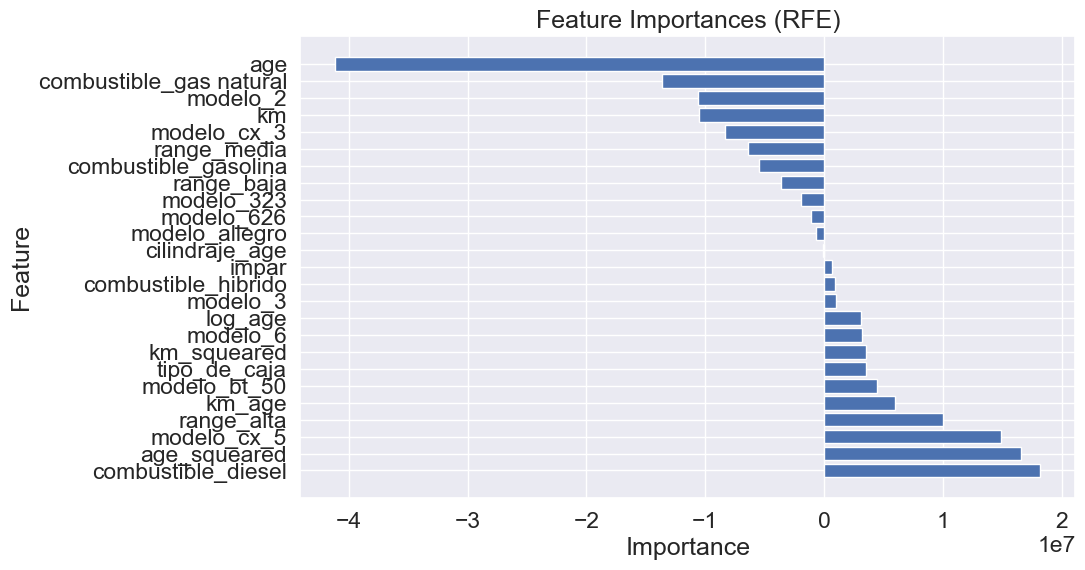

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Seleccionar variables predictoras y target
#x = df_new.drop(columns=["precio","id","modelo"],errors='ignore')

# Split the data into features (X) and target variable (y)
X = df_clean.drop(['id', 'precio','ciudad','color','nombre_carro'], axis=1)
y = df_clean['precio']

# Standardize the numerical variables
numerical_vars = ['km', 'cilindraje', 'age', 'km_age', 'cilindraje_age', 'km_squeared', 'age_squeared', 'log_km', 'log_age']
print(f'=== num_cols: {numerical_vars} === ')
#inputar valores infinitos con Nan
X[numerical_vars] = X[numerical_vars].replace([np.inf, -np.inf], np.nan)
# imputar valores faltantes con la mediana
X[numerical_vars] = X[numerical_vars].fillna(X[numerical_vars].median())
scaler = StandardScaler()
X[numerical_vars] = scaler.fit_transform(X[numerical_vars])

# Perform feature selection using RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=25)
X_rfe = rfe.fit_transform(X, y)

# Get the feature importances from the RFE model
feature_importances = rfe.estimator_.coef_
# Get the names of the selected features
selected_features = X.columns[rfe.support_]
selected_features_pairs = list(zip(selected_features, feature_importances))
for feature, importance in selected_features_pairs:
    print(f'{feature}: {importance:.4f}')

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'feature': selected_features, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (RFE)')
plt.show()


km: -6104959.5428
tipo_de_caja: 6363118.7432
age: -19065305.4890
range_media: -19841927.8505
range_alta: 10097200.5595
combustible_diesel: 18862738.7862
combustible_gas natural: -15429548.0486


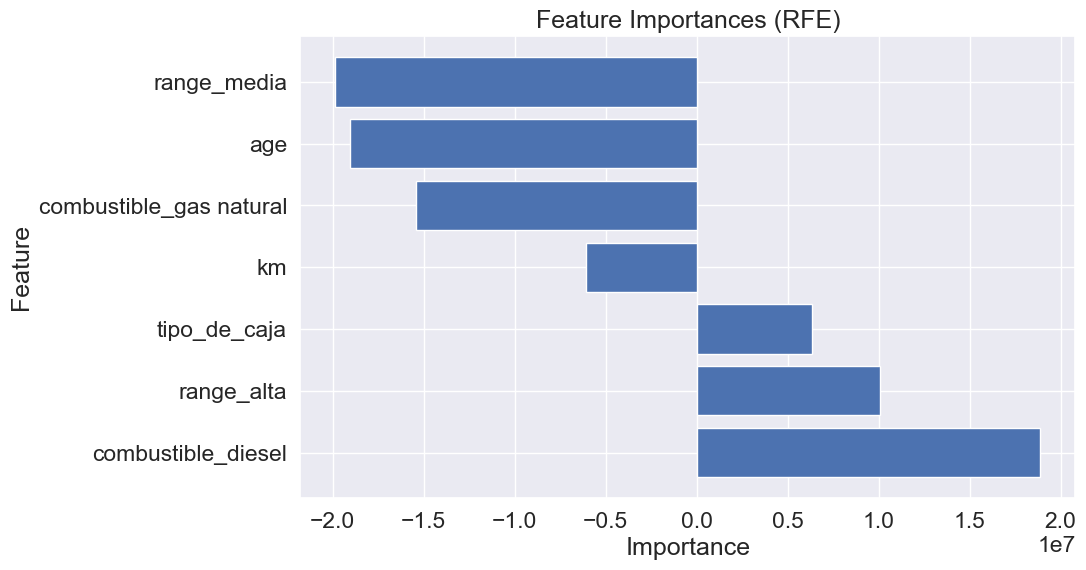

In [106]:
columns_fit = [ 'km', 'tipo_de_caja', 'age',  'range_media', 'range_alta', 'combustible_diesel', 'combustible_gas natural']

X = X[columns_fit]

# Perform feature selection using RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=7)
X_rfe = rfe.fit_transform(X, y)

# Get the feature importances from the RFE model
feature_importances = rfe.estimator_.coef_
# Get the names of the selected features
selected_features = X.columns[rfe.support_]
selected_features_pairs = list(zip(selected_features, feature_importances))
for feature, importance in selected_features_pairs:
        print(f'{feature}: {importance:.4f}')

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'feature': selected_features, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (RFE)')
plt.show()


In [111]:
X.columns

Index(['km', 'tipo_de_caja', 'age', 'range_media', 'range_alta',
       'combustible_diesel', 'combustible_gas natural'],
      dtype='object')

In [109]:


# dividir en pruebas y validación
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

training_score = []
testing_score = []

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)


    # R^2 Score
    train_r2 = r2_score(y_train, x_train_pred)
    test_r2 = r2_score(y_test, x_test_pred)
    
    # Root Mean Squared Error (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, x_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, x_test_pred))
    
    # Mean Absolute Percentage Error (MAPE)
    train_mape = np.mean(np.abs((y_train - x_train_pred) / y_train)) * 100
    test_mape = np.mean(np.abs((y_test - x_test_pred) / y_test)) * 100
    
    training_score.append(train_r2 * 100)
    testing_score.append(test_r2 * 100)
    
    print(f"r2_Score of {model} model on Training Data is: {train_r2 * 100:.2f}")
    print(f"r2_Score of {model} model on Testing Data is: {test_r2 * 100:.2f}")
    print(f"RMSE of {model} model on Training Data is: {train_rmse:.2f}")
    print(f"RMSE of {model} model on Testing Data is: {test_rmse:.2f}")
    print(f"MAPE of {model} model on Training Data is: {train_mape:.2f}%")
    print(f"MAPE of {model} model on Testing Data is: {test_mape:.2f}%")
    
    # Obtener los coeficientes de la regresión
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    intercept = model.intercept_
    
    print("\nIntercepto del modelo:", intercept)
    print("Coeficientes del modelo:\n", coefficients)
    return None

model = LinearRegression()
model_prediction(model)


x_train - >   (2295, 7)
x_test - >   (574, 7)
y_train - >   (2295,)
y_test - >   (574,)
r2_Score of LinearRegression() model on Training Data is: 86.33
r2_Score of LinearRegression() model on Testing Data is: 88.97
RMSE of LinearRegression() model on Training Data is: 12115781.95
RMSE of LinearRegression() model on Testing Data is: 10722260.06
MAPE of LinearRegression() model on Training Data is: 18.06%
MAPE of LinearRegression() model on Testing Data is: 17.88%

Intercepto del modelo: 75712212.39062124
Coeficientes del modelo:
                    Feature   Coefficient
0                       km -6.242826e+06
1             tipo_de_caja  6.091325e+06
2                      age -1.906429e+07
3              range_media -2.037238e+07
4               range_alta  9.565818e+06
5       combustible_diesel  1.972236e+07
6  combustible_gas natural -1.519552e+07


In [114]:
# Calculate the standard deviation of km and age in the original data
km_std = df_clean['km'].std()
age_std = df_clean['age'].std()

# Calculate the original coefficients for km and age
km_coef_original = -6.242826e+06 / km_std
age_coef_original = -1.906429e+07 / age_std

print(f"Coeficiente original de km: {km_coef_original}")
print(f"Coeficiente original de age: {age_coef_original}")


Coeficiente original de km: -122.6427950858749
Coeficiente original de age: -3047837.859915151


model_prediction(DecisionTreeRegressor())
model_prediction(DecisionTreeRegressor())
model_prediction(RandomForestRegressor())
model_prediction(AdaBoostRegressor())
model_prediction(LGBMRegressor())
model_prediction(XGBRegressor())
model_prediction(CatBoostRegressor())
model_prediction(GradientBoostingRegressor())

In [112]:
scaler.fit_transform(df_clean[columns_fit])


# Coeficientes del modelo ajustado
coef_scaled = model.coef_
intercept_scaled = model.intercept_

# Parámetros del scaler
mean_ = scaler.mean_
scale_ = scaler.scale_

# Desnormaliza los coeficientes
coef_original = coef_scaled / scale_
intercept_original = intercept_scaled - np.sum((coef_scaled * mean_) / scale_)

print("Coeficientes originales:", coef_original)
print("Intercepta original:", intercept_original)

Coeficientes originales: [-1.22664178e+02  1.34578262e+07 -3.04836915e+06 -4.22002911e+07
  2.06475042e+07  1.82252490e+08 -4.07243193e+08]
Intercepta original: 118334831.23487732


In [109]:

model = GradientBoostingRegressor()
model_prediction(model)

r2_Score of GradientBoostingRegressor() model on Training Data is: 82.76
r2_Score of GradientBoostingRegressor() model on Testing Data is: 78.10
RMSE of GradientBoostingRegressor() model on Training Data is: 13764731.15
RMSE of GradientBoostingRegressor() model on Testing Data is: 14961821.19
MAPE of GradientBoostingRegressor() model on Training Data is: 16.63%
MAPE of GradientBoostingRegressor() model on Testing Data is: 17.73%


AttributeError: 'GradientBoostingRegressor' object has no attribute 'coef_'

# Mercado Libre

## Sección 1. Calidad Datos Mercadolibre

In [311]:

# Define function to clean and preprocess DataFrame
def clean_dataframe(df:pd.DataFrame, schema:dict, missing_columns_check:list) -> pd.DataFrame:
    print(f'df original size: {df.shape} - columns: {df.columns}' )
    # Standarize column names
    df = standarize_column_names(df)
    # Remove duplicates
    df = df.drop_duplicates()
    # Handle missing values
    df = df.dropna(subset=missing_columns_check)

    default_value_int = -1

    # Format fields to match the schema
    for column, dtype in schema.items():
        if column in df.columns:
            if dtype == 'date' and df[column].dtype != 'datetime64[ns]':
                df[column] = pd.to_datetime(df[column])
            elif dtype == 'int' and df[column].dtype != 'int64':
                df[column] = df[column].replace([np.inf, -np.inf, np.nan], default_value_int)
                df[column] = df[column].astype('int')
            elif dtype == 'double' and (df[column].dtype != 'float64' and df[column].dtype != 'int64'):
                df[column] = df[column].str.replace('$','').str.replace('.','').str.replace(',','').str.replace(' km','').str.replace(' ','').astype('float')
            elif dtype == 'string' and df[column].dtype != 'object':
                df[column] = df[column].astype('str')
            elif dtype == 'category':
                df[column] = df[column].str.lower().str.replace('(', '').str.replace(')', '')\
                    .str.replace('.','').str.replace('/','_').str.replace('-','_').str.replace('__','_')\
                    .str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u').astype('string')
    print(f'df cleaned size: {df.shape} - columns: {df.columns}' )
    return df

def fix_motor_unit(x:str) -> float:
    x = str(x).lower().replace('cc','').replace('turbo','').replace('l','').replace('t','').replace('.','.')\
        .split(' ')[0].replace('x','').replace('-','').replace('cc','').replace('L','')
    try:
        x = float(x)
    except:
        x= -1
    if x >=800: 
        x = x/1000
    x = round(x,1)
    if x >= 6:
        x = -1
    return x

def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,palette="Set2",order=df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def scatter_plot(cols, filter='none', value='duster'):
    """ Function to plot scatter plots for the given columns
    Args:
        cols (list): List of columns to plot
        filter (str): Filter to apply to the data 
            none: No filter
            modelo: Filter by modelo
            marca: Filter by marca
        value (str): Value to filter the data
    """
    num_cols = len(cols)
    num_rows = (num_cols - 1) // 3 + 1
    
    plt.figure(figsize=(15, 6 * num_rows))
    
    for i, col in enumerate(cols):
        plt.subplot(num_rows, 3, i+1)
        if filter == 'none':
            sns.scatterplot(x=col, y="price", data=df, color="blue")
        elif filter == 'modelo':
            sns.scatterplot(x=col, y="price", data=df[df['modelo'].str.contains(value)], color="blue")
        elif filter == 'marca':
            sns.scatterplot(x=col, y="price", data=df[df['marca'].str.contains(value)], color="blue")
        else:
            sns.scatterplot(x=col, y="price", data=df, color="blue")

        plt.title(f"{col} vs Price", fontweight="black", fontsize=20, pad=10)
        plt.tight_layout()


In [312]:
missing_columns_check = ['id_car','price','kilometros','año']

schema = {  'id_car':'string',
            'title':'string',
            'link':'string',
            'price':'double',
            'seller_name':'string',
            'city':'category',
            'color':'category',
            'aire_acondicionado':'category',
            'marca':'category',
            'puertas':'int',
            'motor':'string',
            'tipo_de_combustible':'category',
            'kilometros':'string',
            'modelo':'category',
            'transmision':'category',
            'version':'string',
            'año':'int',
            'cilindrada':'string',
            'capacidad_de_personas':'int',
            'potencia':'string',
            'control_de_traccion':'category',
            'unico_dueño':'category',
            'largo':'string',
            'linea':'string',
            'cilindros':'string',
}


json_file = f'data/car_attributes.json'
df = pd.read_json(f'../{json_file}')
# eliminar columnas innecesarias o con muchos nulos
df = df.drop(columns=['condition','category_id','catalog_product_id','domain_id','currency_id','seller_id','country','stop_time',\
                    'condicion_del_item','aceleracion_nafta','autonomia_con_nafta','consumo_promedio_nafta','modelo_detallado',\
                    'marca_fipe','modelo_fipe','año_fipe','velocidad_maxima_con_nafta', 'vehiculos_verificados','cilindros',\
                    'control_de_tracci��n','transmisi��n','versi��n','inspeccion_vehicular','linea','largo','unico_dueño'], errors='ignore')
print(list(df.columns))
print(f'=== df shape: {df.shape} === ')

df = clean_dataframe(df, schema, missing_columns_check)

# elimna datos de marcas menos populares
top_20_marcas = df['marca'].value_counts().head(20)
df = df.query(f'marca in {list(top_20_marcas.index)}')
print(f'=== df (top marcas) shape: {df.shape} === ')

# elimina datos con valores no permitidos de puertas
df['puertas'] = df['puertas'].apply(lambda x: int(x) if x >=2 and x <=5 else -1)
df = df.query('puertas != -1')
print(f'=== df (puertas) shape: {df.shape} === ')

# create new variables
year_today = 2024
df['age'] = df['año'].apply(lambda x :  year_today-int(x) )

# Corregir algunas valores de las variables categoricas
df['color'] = df['color'].str.split().str[0].str.replace('rosa','rojo').str.replace('beige','blanco').str.replace('celeste','azul')
df['color'] = df['color'].fillna("otro")
df['aire_acondicionado'] = df['aire_acondicionado'].fillna("no")
df['aire_acondicionado'] = df['aire_acondicionado'].apply(lambda x: 1 if x == 'si' else 0)
df['kilometros'] = df['kilometros'].str.replace('km','').str.replace(' ','').astype('float')
df['motor'] =  df['motor'].apply(lambda x:  fix_motor_unit(x))
df['cilindrada'] = df['cilindrada'].apply(lambda x:  fix_motor_unit(x))
df['potencia'] = df['potencia'].str.replace('hp','').str.replace(' ','').astype('float') # hp
df['transmision'] = df['transmision'].str.replace('manual','mecanica')
df['transmision'] = df['transmision'].fillna('mecanica')
df = df.query('motor != -1')
df = df.query('tipo_de_combustible !="n_a"')
print(f'=== df (motor) shape: {df.shape} === ')


['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año', 'cilindrada', 'capacidad_de_personas', 'potencia', 'control_de_traccion', 'transmision']
=== df shape: (43348, 21) === 
df original size: (43348, 21) - columns: Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_traccion', 'transmision'],
      dtype='object')
df cleaned size: (43343, 21) - columns: Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_t

In [313]:
# Procentaje de nulos
df.isna().sum()/df.shape[0] *100


id_car                    0.000000
title                     0.000000
link                      0.000000
price                     0.000000
seller_name               0.000000
city                      0.000000
color                     0.000000
aire_acondicionado        0.000000
marca                     0.000000
puertas                   0.000000
motor                     7.462353
tipo_de_combustible       0.000000
kilometros                0.000000
modelo                    0.000000
version                   0.004962
año                       0.000000
cilindrada               22.307673
capacidad_de_personas     0.000000
potencia                 21.670098
control_de_traccion       8.516708
transmision               0.000000
age                       0.000000
dtype: float64

In [198]:
# Analisis de calidad de los datos con profiling

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("../quality/quality_report.html")

Summarize dataset:  83%|████████▎ | 24/29 [00:01<00:00, 15.18it/s, Calculate auto correlation]             c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6 0 6 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
c:\Users\Msastoqu\OneDrive - Caracol Televisión S.A\Master\TFM\project\env\lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues


## Sección 2.  Análisis Exploratorio

In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from scipy.stats import shapiro
from scipy.stats import kstest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [315]:
# Información general del dataset
print(f'=== df shape: {df.shape} === ')
df.info()

=== df shape: (40309, 22) === 
<class 'pandas.core.frame.DataFrame'>
Index: 40309 entries, 0 to 43347
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_car                 40309 non-null  object 
 1   title                  40309 non-null  object 
 2   link                   40309 non-null  object 
 3   price                  40309 non-null  int64  
 4   seller_name            40309 non-null  object 
 5   city                   40309 non-null  string 
 6   color                  40309 non-null  object 
 7   aire_acondicionado     40309 non-null  int64  
 8   marca                  40309 non-null  string 
 9   puertas                40309 non-null  int64  
 10  motor                  37301 non-null  float64
 11  tipo_de_combustible    40309 non-null  string 
 12  kilometros             40309 non-null  float64
 13  modelo                 40309 non-null  string 
 14  version                40307

Comentario:
- Se tiene 40.309 registros de vehículos desde el 2010 hasta el 2024, de 20 marcas, todos carros usados
- se cuentan con 6 variables categorias, 9 númericas y 7 tipo string de las cuales posiblemente solo se utilice el ID

In [204]:
df.describe()

price       puertas         motor    kilometros           año  \
count  4.030900e+04  40309.000000  37301.000000  4.030900e+04  40309.000000   
mean   9.021937e+07      4.566921      2.057331  7.118262e+04   2017.454688   
std    7.545694e+07      0.749230      0.734461  6.004690e+04      3.792782   
min    1.800000e+06      2.000000      0.000000  1.000000e+00   2010.000000   
25%    4.400000e+07      4.000000      1.600000  3.399600e+04   2014.000000   
50%    6.800000e+07      5.000000      2.000000  6.400000e+04   2018.000000   
75%    1.100000e+08      5.000000      2.400000  9.800000e+04   2021.000000   
max    2.480000e+09      5.000000      5.700000  6.350000e+06   2024.000000   

         cilindrada  capacidad_de_personas      potencia           age  
count  31317.000000           40309.000000  31574.000000  40309.000000  
mean       2.047521               3.402615    158.488091      6.545312  
std        0.720122               2.558606     68.700887      3.792782  
min       -1.000000              -1.000000     10.000000      0.000000  
25%        1.600000               2.000000    109.000000      3.000000  
50%        2.000000               5.000000    148.000000      6.000000  
75%        2.400000               5.000000    184.000000     10.000000  
max        5.700000               8.000000    585.000000     14.000000

teniendo en cuenta la calidad de la información presente se realizan los sigueintes hallazgos:
- se encuentran valores atipicos en la variable price, kilometros. 
- Entre motor y cilindrada, motor tiene un mejor nivel de calidad. que ronda sobre el 9% de datos nulos
- la variable modelo y versión tienen una alta cardinalidad, queire decir que no sirven como variable categorica dentro del modelo
- Aire acondicionado se puede volver booleana
- La variable categoria Tipo de combustible esta muy desbalanceada hacia la categoria gasolina
- la variable capacidad e personas tiene un 24% de valores negativos (corrección de nulos) es posible que no se utilice

In [248]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'seller_name', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'año',
       'cilindrada', 'capacidad_de_personas', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

In [316]:
df = df.drop(columns=['seller_name','año','cilindrada','capacidad_de_personas'], errors='ignore')
print(f'=== df shape: {df.shape} === ')
print(list(df.columns))



=== df shape: (40309, 18) === 
['id_car', 'title', 'link', 'price', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia', 'control_de_traccion', 'transmision', 'age']


### Precio

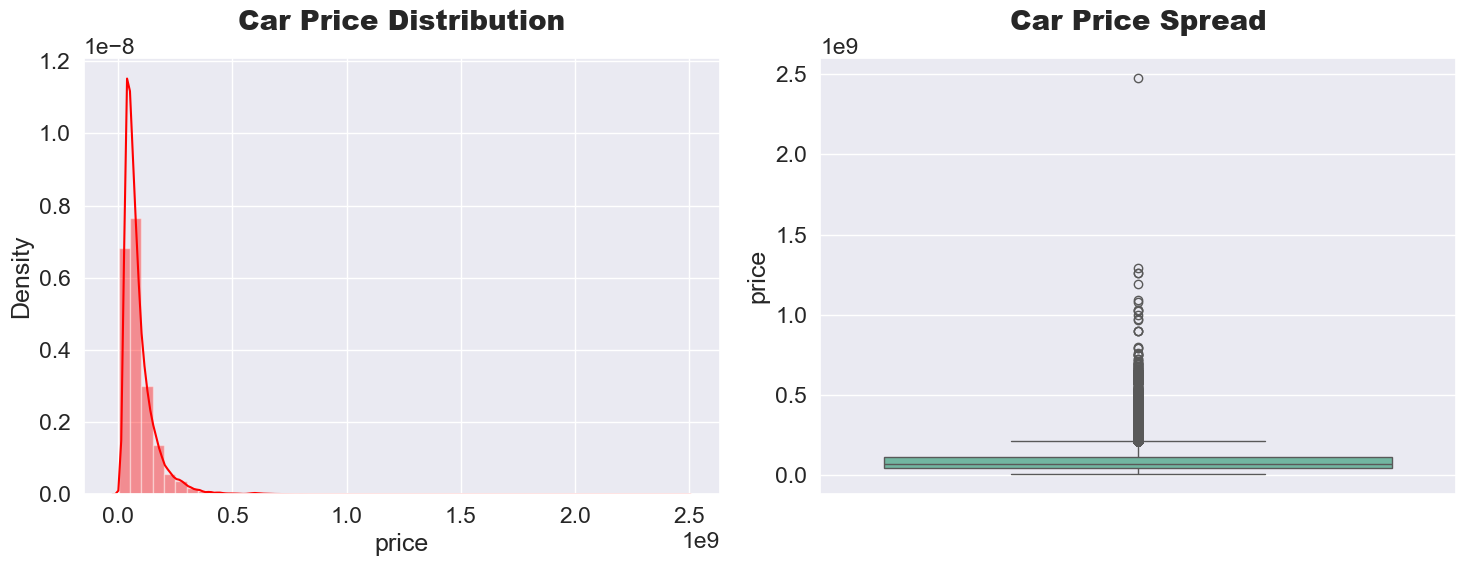

In [267]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [266]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

min          mean      median           max           std  \
price  1800000.0  9.021937e+07  68000000.0  2.480000e+09  7.545694e+07   

          skew  
price  4.12305

Se observan grandes valores atípicos, pro la gran diferencia entre la media y la mediana, así como que la curva esta inclinada hacia la izqueirda (precios más bajos, skew+)

In [302]:
# Validemos si los datos de precio cumplen con la distribución normal
# Realizar la prueba de Shapiro-Wilk
stat, p = shapiro(df['price'])
print('Shapiro --> Statistics=%.3f, p=%.3f' % (stat, p))
# Interpretar el resultado
alpha = 0.05
if p > alpha:
    print('\tMuestra se parece a una curva gausiana (No se rechaza H0)')
else:
    print('\tMuestra no luce como una curva gausiana (se rechaza H0)')

# Realizar la prueba de Kolmogorov-Smirnov
stat, p = kstest(df['price'], 'norm')
print('Kolmogorov -->Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar el resultado
if p > alpha:
    print('\tMuestra se parece a una curva gausiana (No se rechaza H0)')
else:
    print('\tMuestra no luce como una curva gausiana (se rechaza H0)')

Shapiro --> Statistics=0.904, p=0.000
	Muestra no luce como una curva gausiana (se rechaza H0)
Kolmogorov -->Statistics=1.000, p=0.000
	Muestra no luce como una curva gausiana (se rechaza H0)


Ambas pruebas demuestran que los datos no son estan bajo la curva de normalidad, por lo que se decide implementar un método de quitar valores atípicos medaite IQR

In [317]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== IQR: {IQR} - Lower Bound: {lower_bound} - Upper Bound: {upper_bound} ===")
# Filtrar los valores atípicos
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
print(f"=== Filtered DataFrame (sin valores atípicos de Precio): {df_filtered.shape} ===")

=== IQR: 66000000.0 - Lower Bound: -55000000.0 - Upper Bound: 209000000.0 ===
=== Filtered DataFrame (sin valores atípicos de Precio): (37770, 18) ===


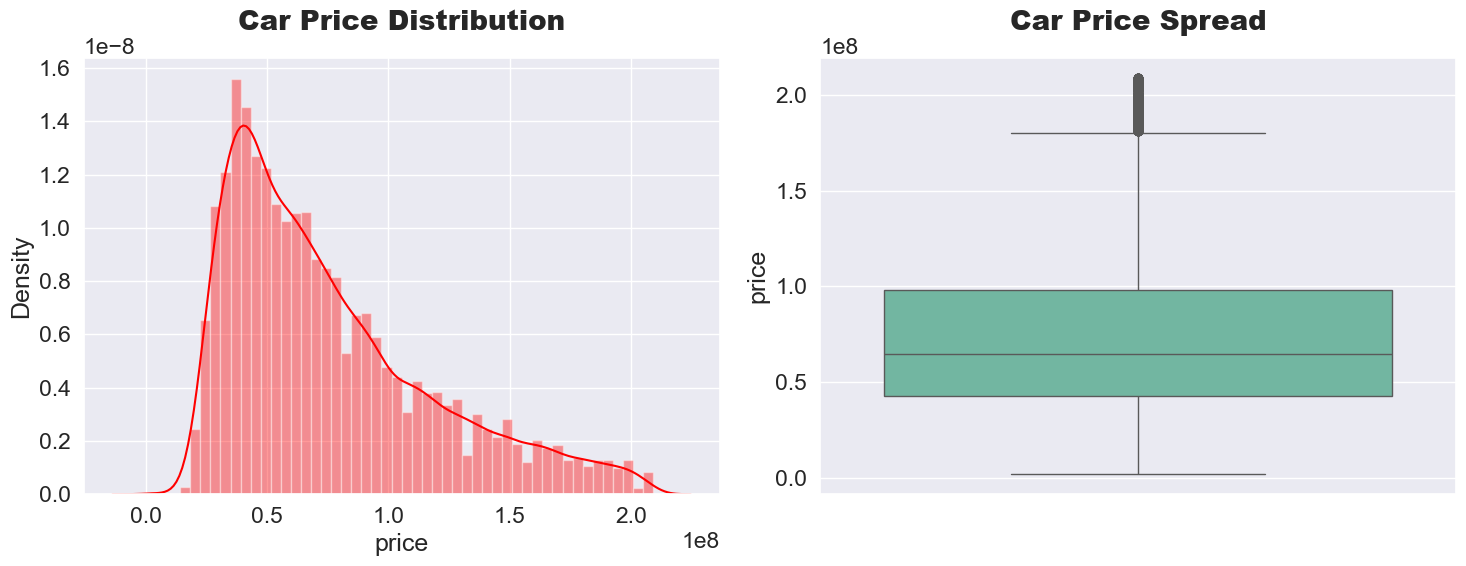

In [270]:
# Visualizar la distribución de los precios con el ajuste
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

### Kilometros recorridos

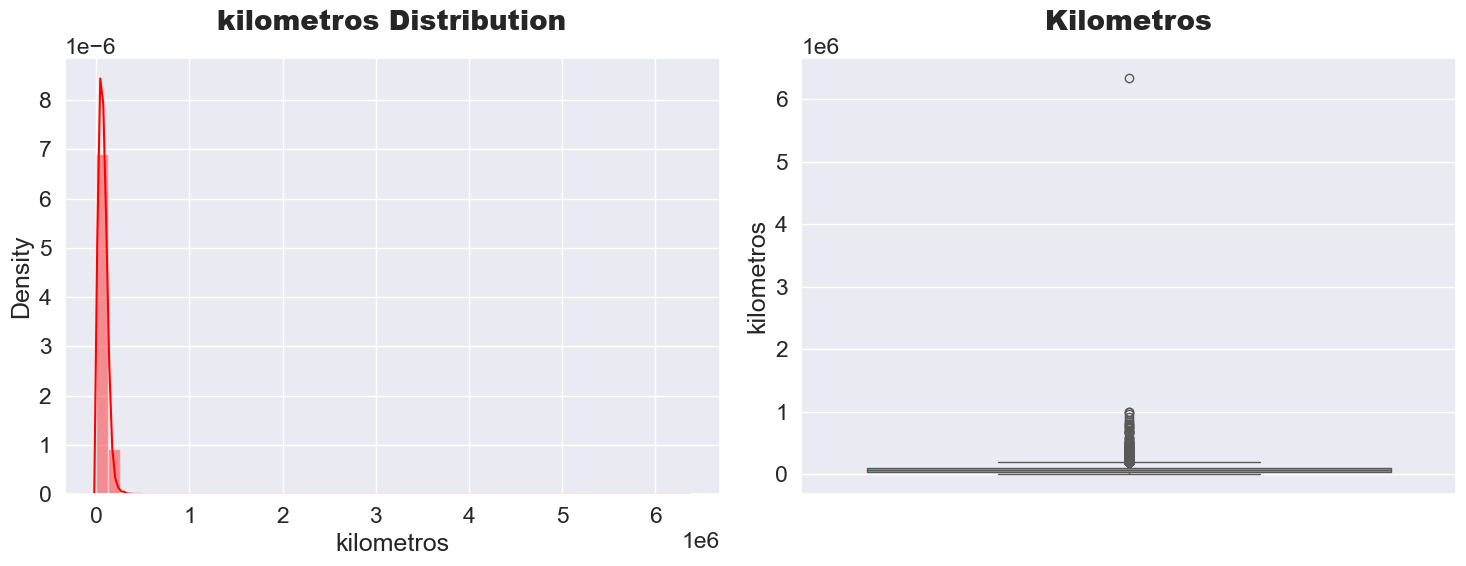

In [271]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["kilometros"],color="red",kde=True)
plt.title("kilometros Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["kilometros"],palette="Set2")
plt.title("Kilometros",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

tiene un comportamiento muy parecido al precio, por tal motivo se utilizará la misma técnica del rango intercuartil para eliminar los atípicos

In [318]:
# Calcular los cuartiles y el rango intercuartílico (IQR)
Q1 = df_filtered['kilometros'].quantile(0.25)
Q3 = df_filtered['kilometros'].quantile(0.75)
IQR = Q3 - Q1
# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"=== IQR: {IQR} - Lower Bound: {lower_bound} - Upper Bound: {upper_bound} ===")
# Filtrar los valores atípicos
df_filtered = df_filtered[(df_filtered['kilometros'] >= lower_bound) & (df_filtered['kilometros'] <= upper_bound)]
print(f"=== Filtered DataFrame (sin valores atípicos de KM): {df_filtered.shape} ===")

=== IQR: 63000.0 - Lower Bound: -57500.0 - Upper Bound: 194500.0 ===
=== Filtered DataFrame (sin valores atípicos de KM): (37105, 18) ===


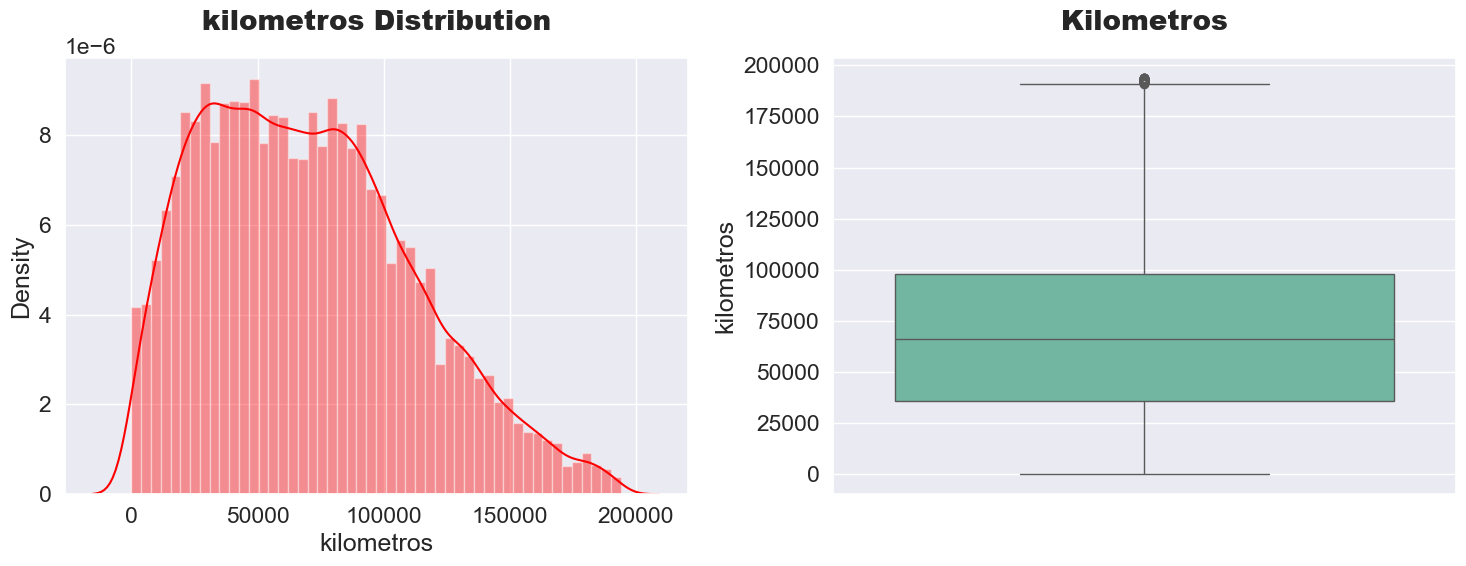

In [319]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df_filtered["kilometros"],color="red",kde=True)
plt.title("kilometros Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df_filtered["kilometros"],palette="Set2")
plt.title("Kilometros",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [320]:
df = df_filtered.copy()
print(f'=== df shape: {df.shape} === {list(df.columns)}')

=== df shape: (37105, 18) === ['id_car', 'title', 'link', 'price', 'city', 'color', 'aire_acondicionado', 'marca', 'puertas', 'motor', 'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia', 'control_de_traccion', 'transmision', 'age']


### Marcas

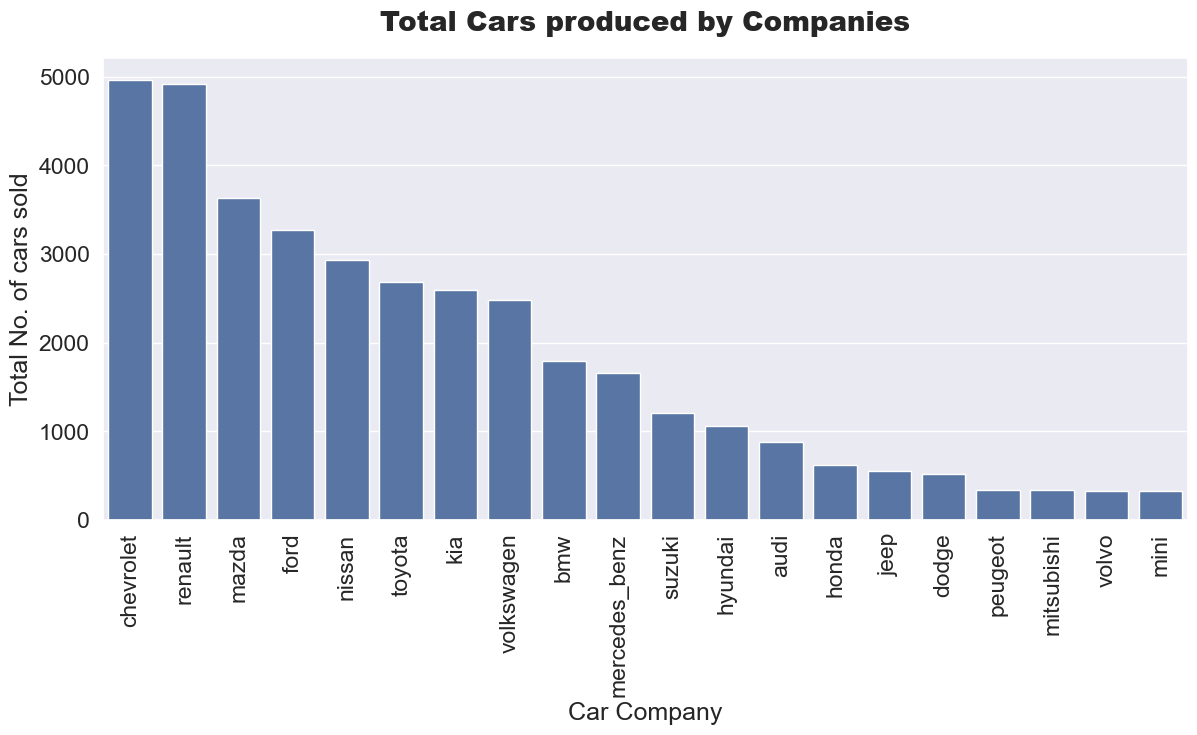

In [277]:
plt.figure(figsize=(14,6))
counts = df["marca"].astype(str).value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)
plt.xticks(rotation=90)
plt.show()

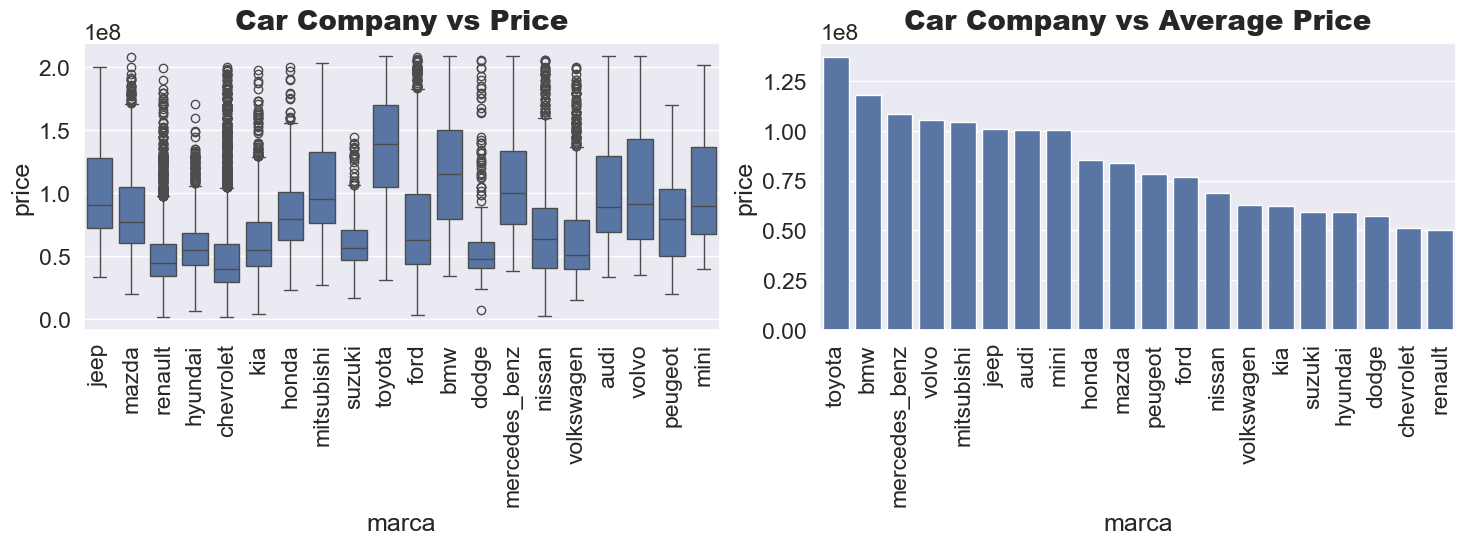

In [278]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="marca",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("marca")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

Se identifican algunas marcas que tienen un costo promedio mas alto como toyota, bmw, mercedez menz, y por el contrario las marcas más economicas, de hecho estan directamente relacionadas con la cantidad de ventas ( renault y chevrolet)

In [260]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

### Tipo de Combustible

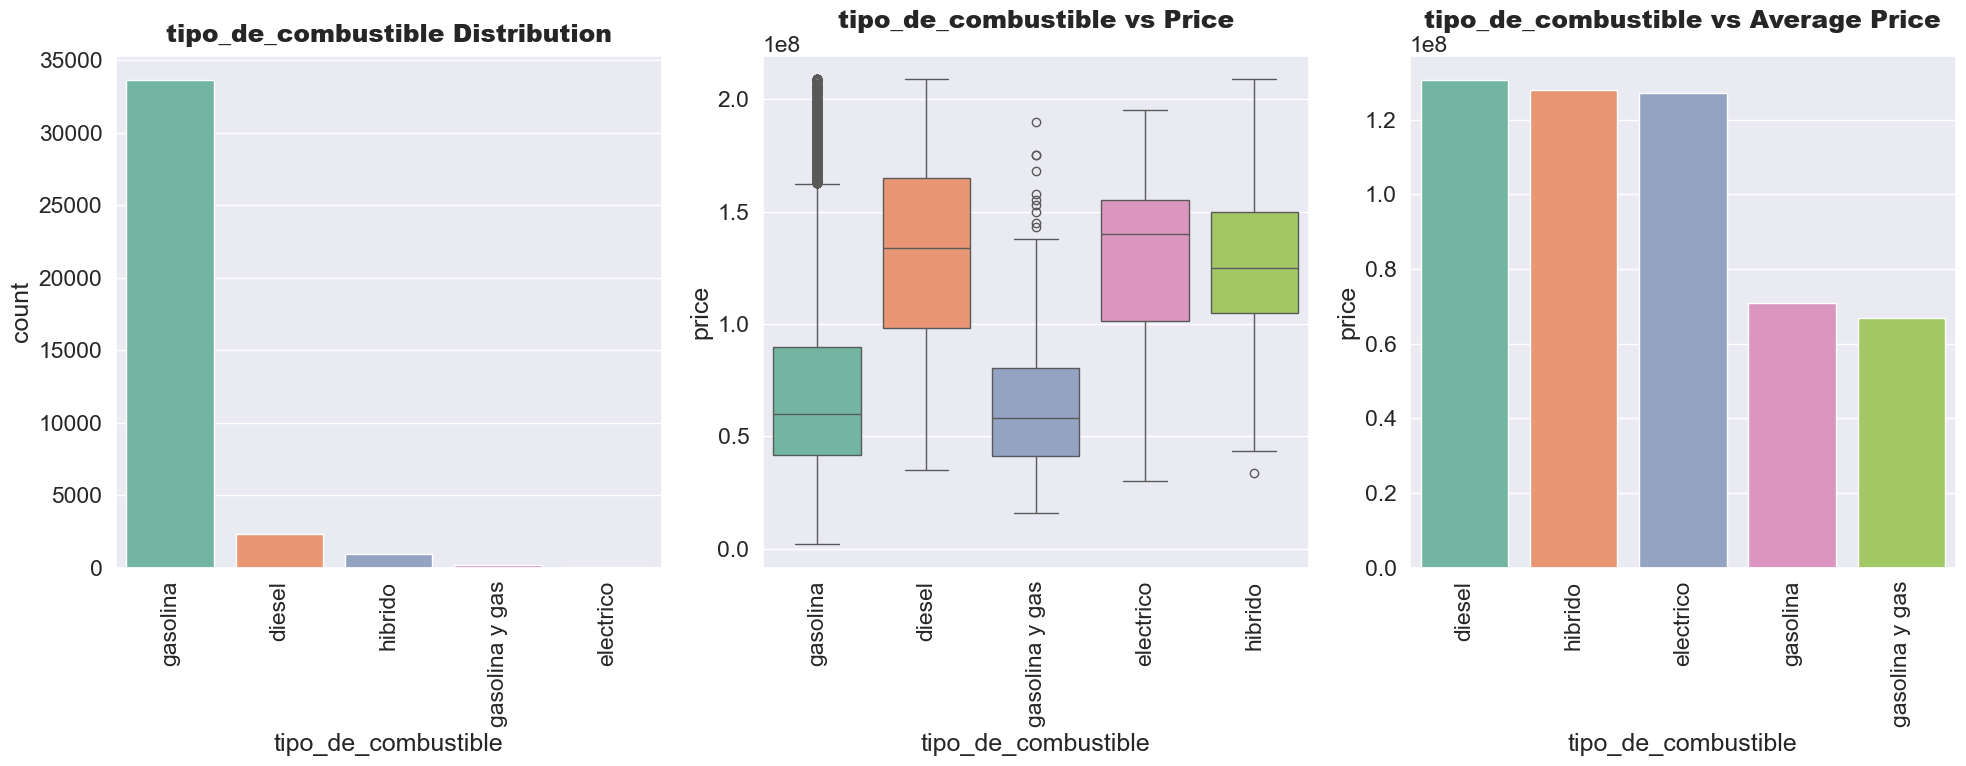

In [279]:
categorical_visualization("tipo_de_combustible")

Se observa como los vehículos de gasolina y de casolina y gass tienden a ser mucho mas económicos que las otras categorias. los vehiculos dissel, electricos e híbridos se posicionan como los de alta gama.

### Control de Tracción

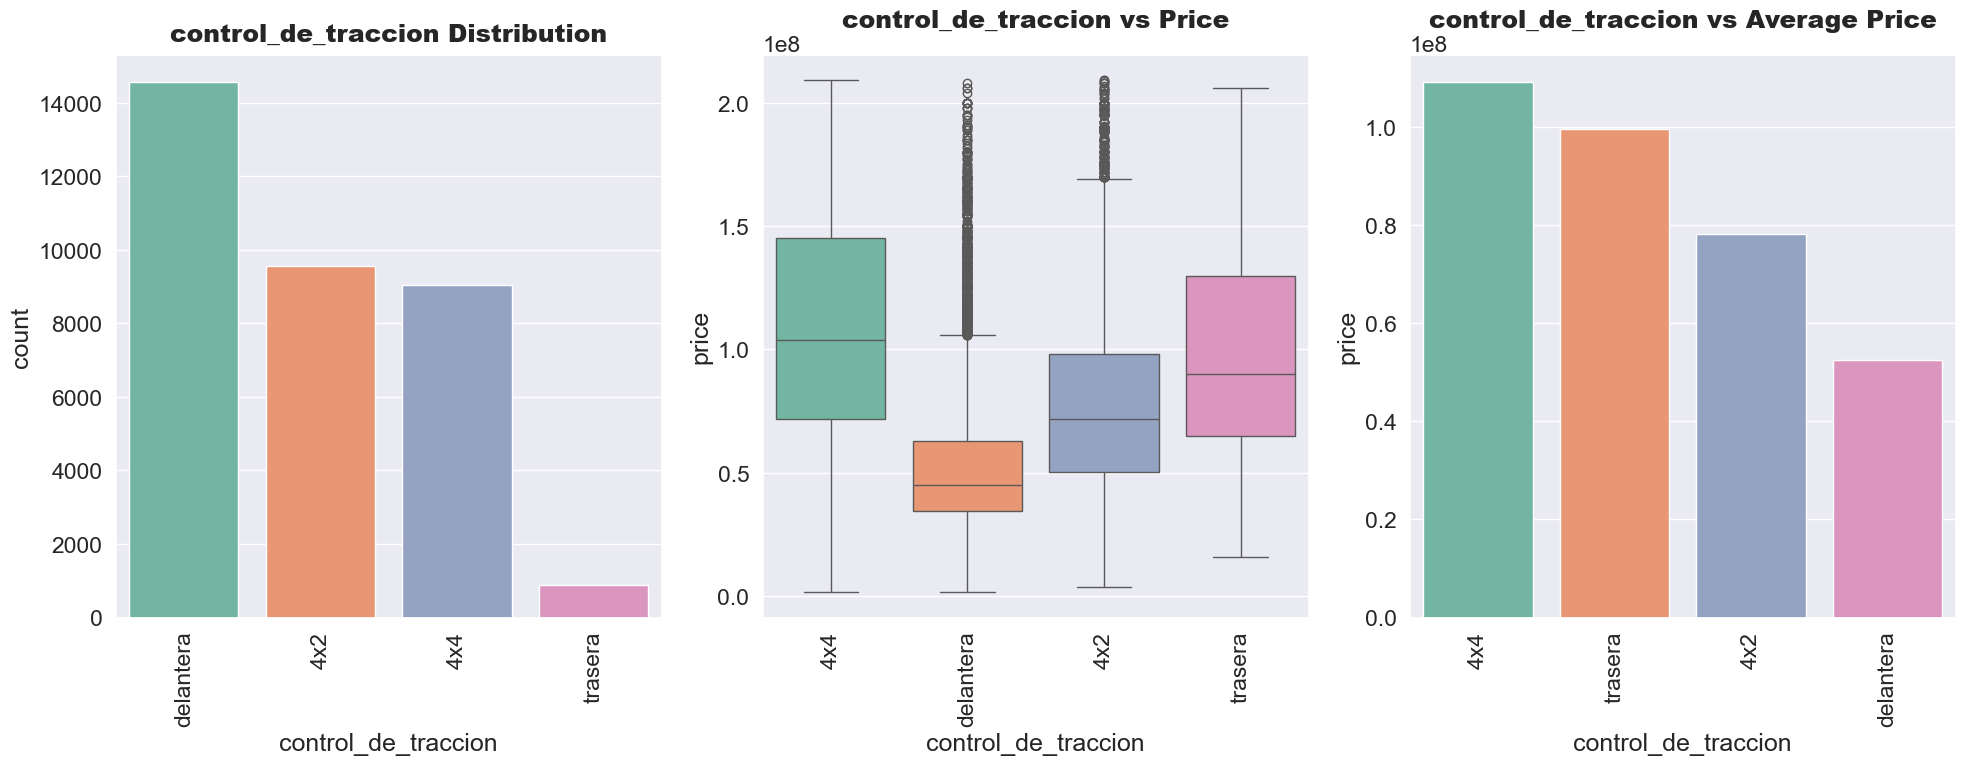

In [281]:
categorical_visualization("control_de_traccion")

### Aire Acondicionado

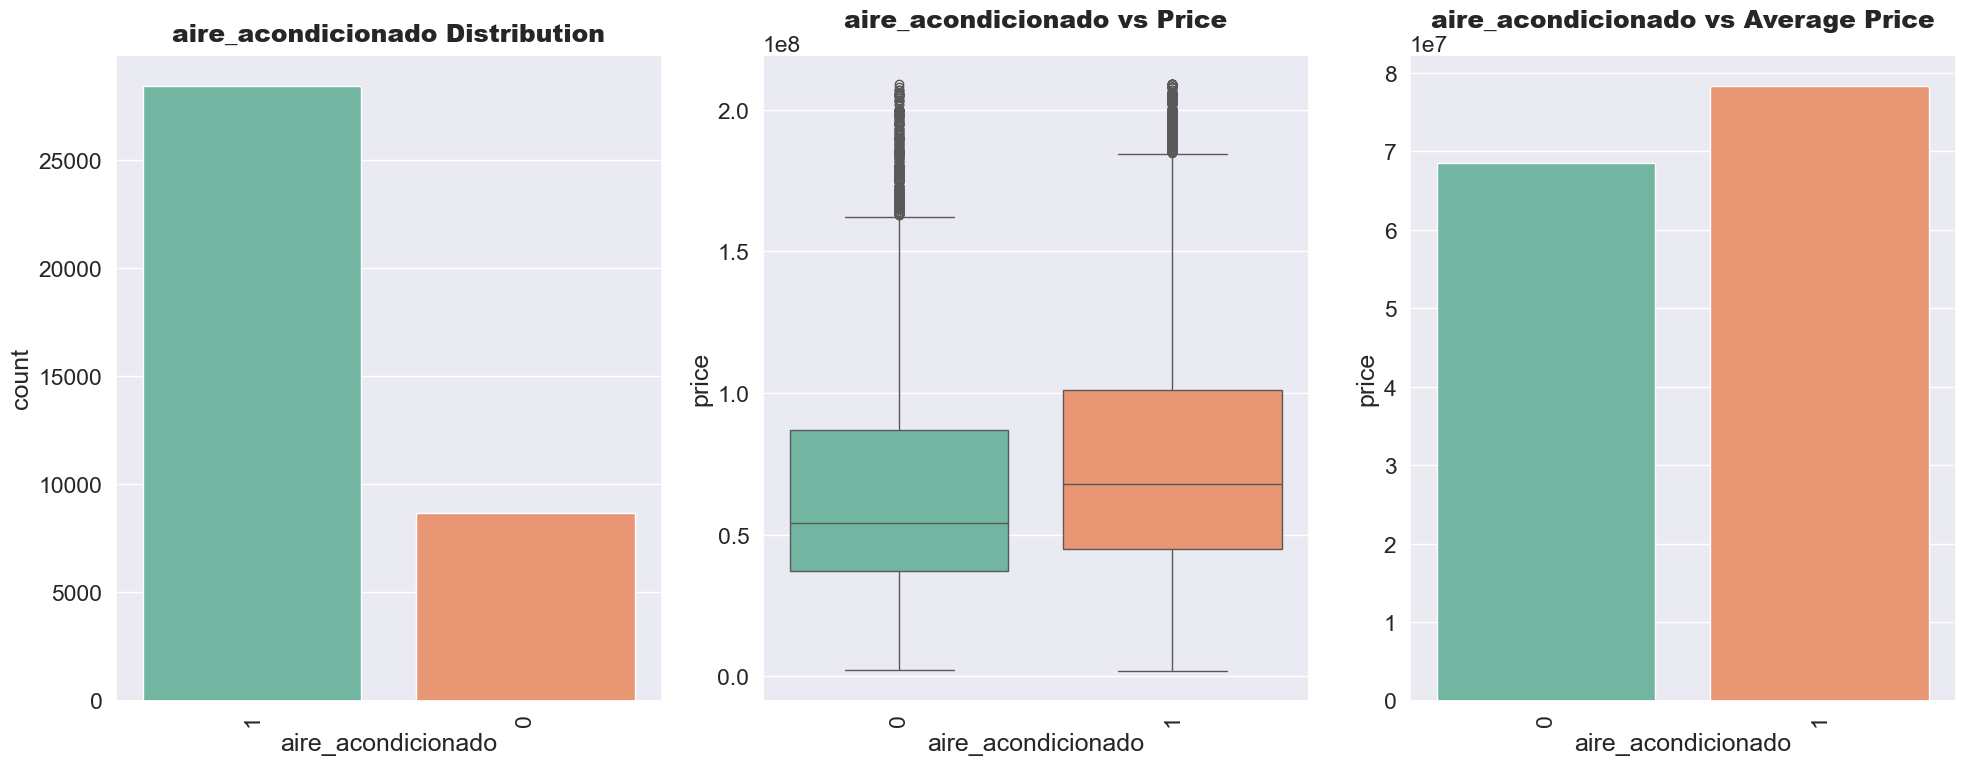

In [282]:
categorical_visualization("aire_acondicionado")

### Transmisión

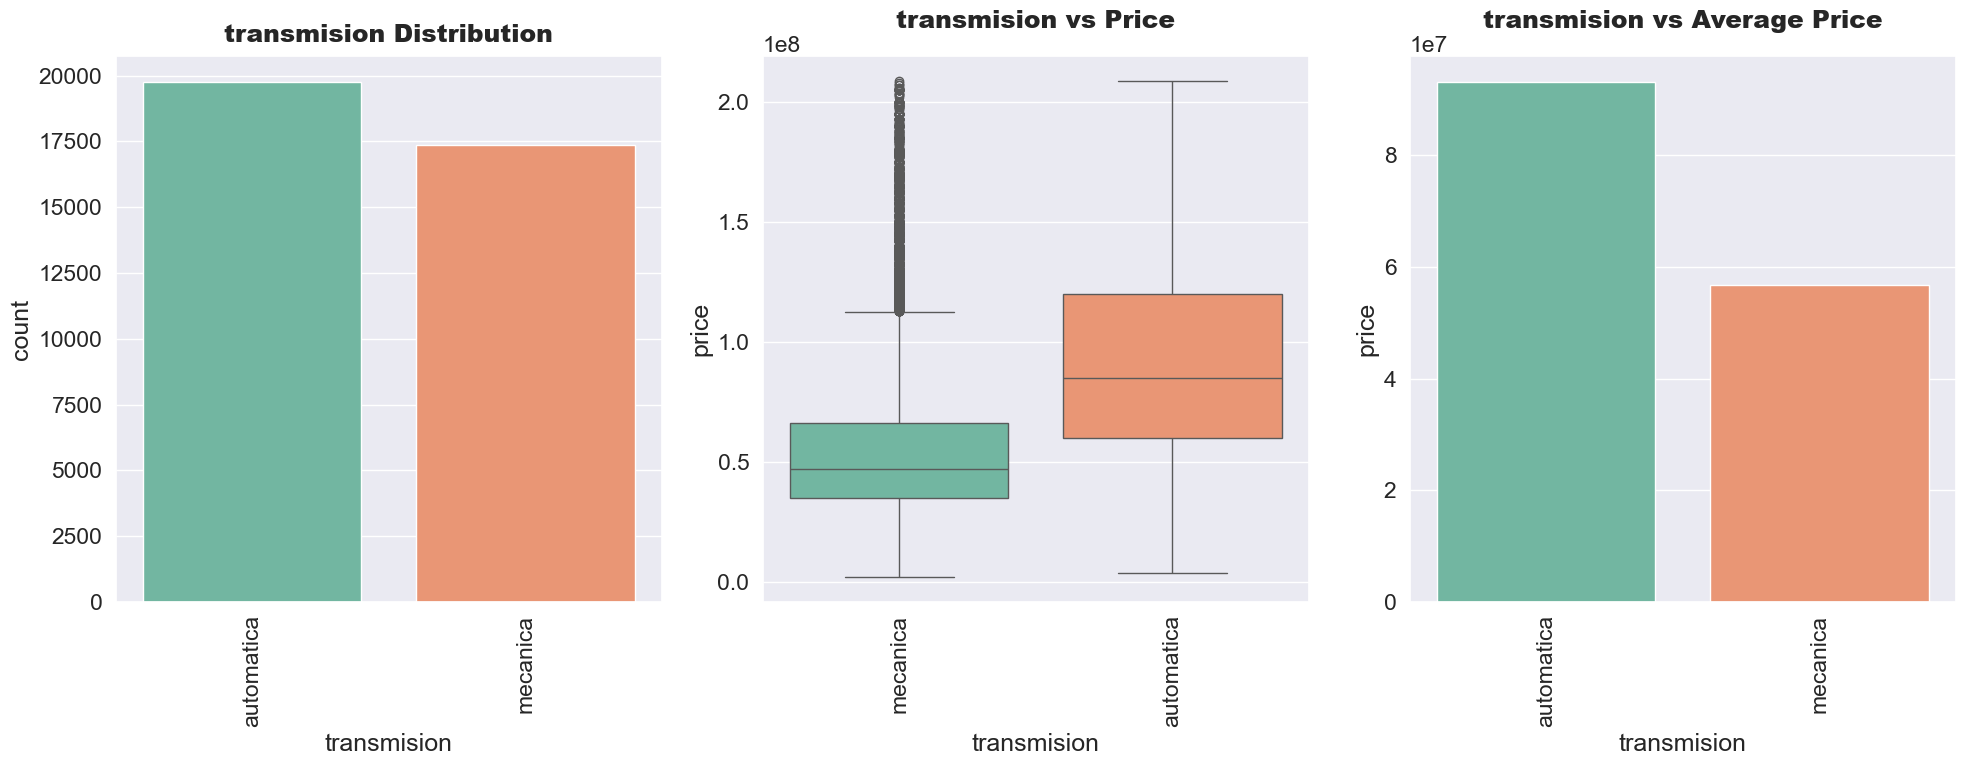

In [283]:
categorical_visualization("transmision")

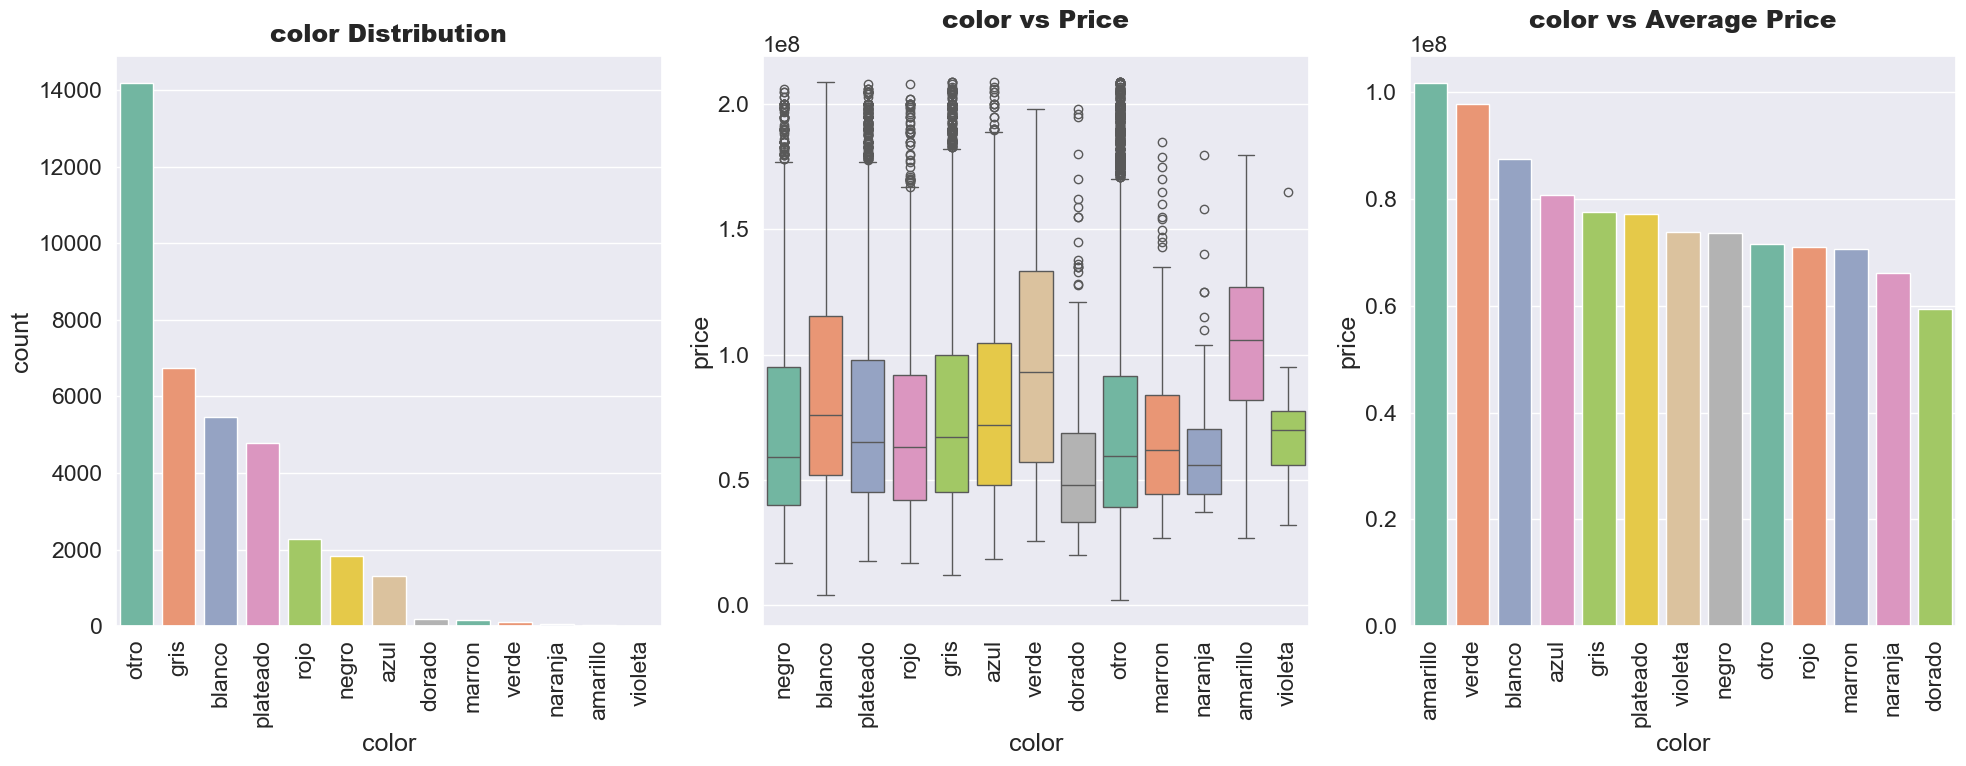

In [286]:
categorical_visualization("color")

## Variables numéricas

In [285]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age'],
      dtype='object')

In [293]:
df[df['modelo'].str.contains('duster')].shape

(1182, 18)

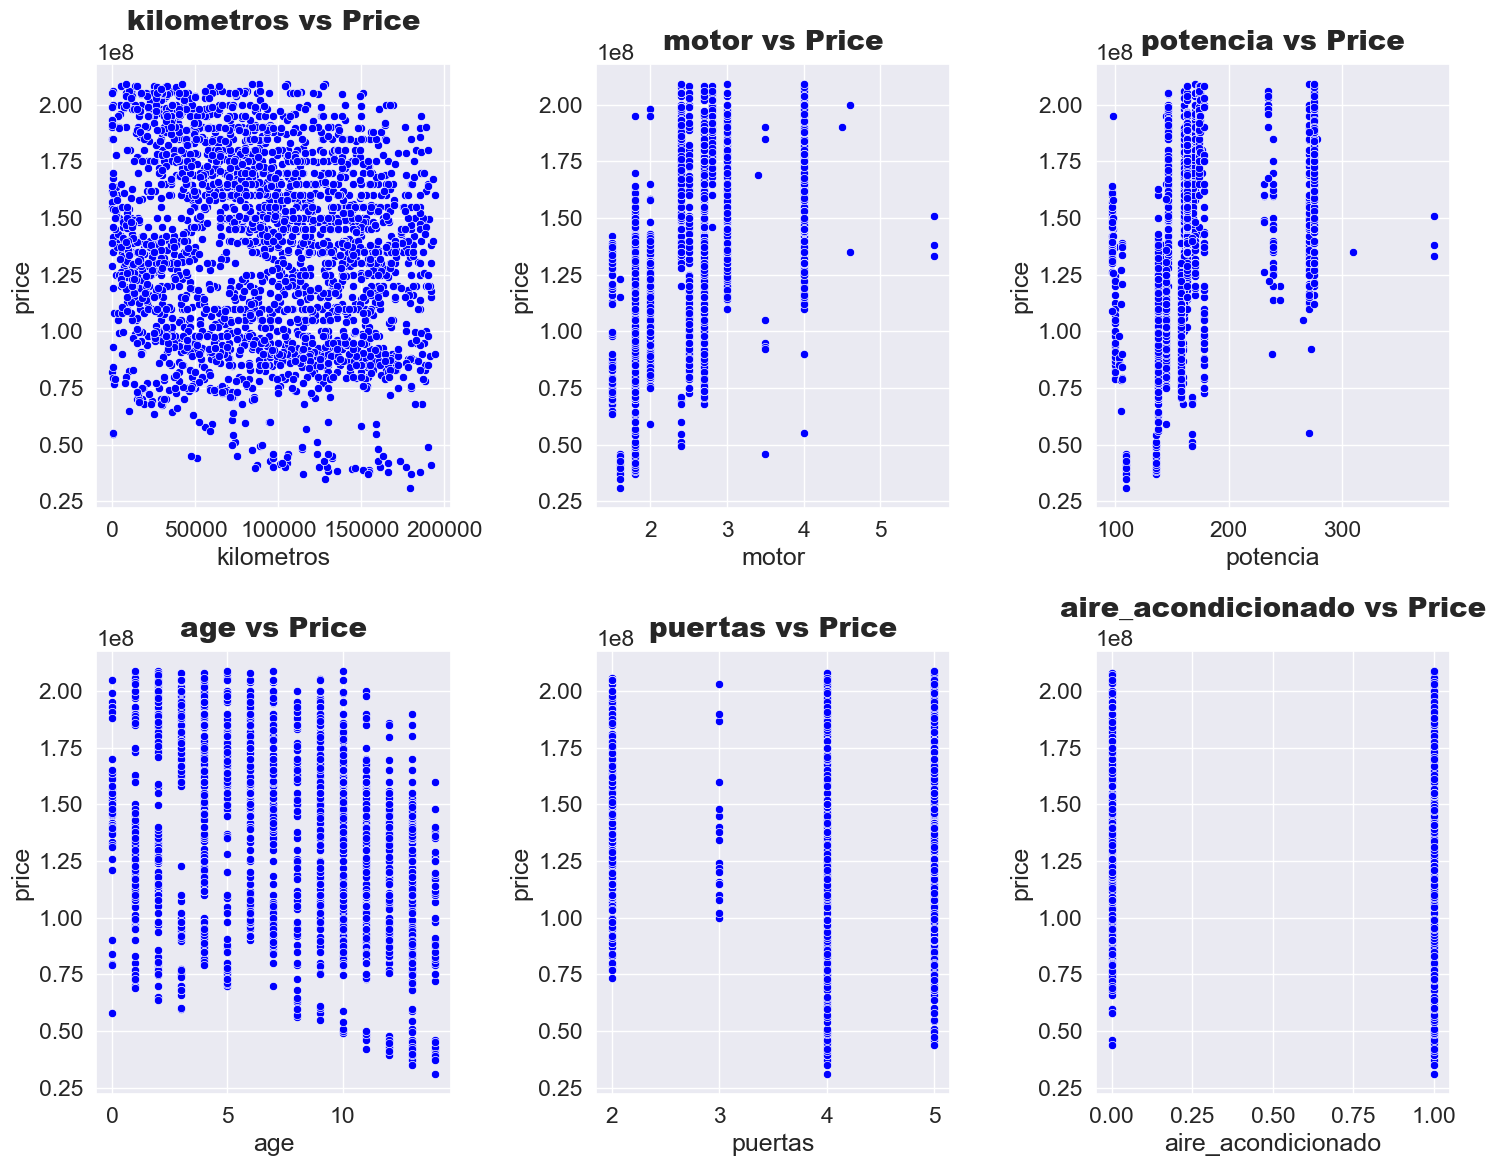

In [304]:
scatter_plot(["kilometros","motor","potencia", "age", "puertas", "aire_acondicionado"], filter='marca', value='toyota')

La verdad es que no se ve que las variables esten muy correlacionadas entre si, sin embargo cuando se realiza el análisis por el modelo de duster, si se encuentra una correlación importante con las variables de kilometros y de age

## Sección 3. Modelado Mercadolibre

### Ampliar caracteristicas

In [321]:
# Crea categoria de gama baja media o alta segun el promedio del valor de cada modelo
z = round(df.groupby(["modelo"])["price"].agg(["mean"]),2).T
df = df.merge(z.T,how="left",on="modelo")
df.rename(columns={"mean":"modelo_mean"},inplace=True)

bins = [0,70000000,120000000,400000000]
cars_bin=['Gama Baja','Gama Media','Gama Alta']
df['cars_range'] = pd.cut(df['modelo_mean'],bins,right=False,labels=cars_bin)
df.head()

id_car                            title  \
0  MCO2391186016         Jeep Compass 2.4 Limited   
1  MCO2391197332                 Mazda 2 1.5 2010   
2  MCO1426750375    Mazda   3  Lxha7 At 2.0 2010    
3  MCO1426711773      Renault Kangoo F76 1.6 2010   
4  MCO1425593285                   Hyundai Tucson   

                                                link     price       city  \
0  https://carro.mercadolibre.com.co/MCO-23911860...  37990000  bogota dc   
1  https://carro.mercadolibre.com.co/MCO-23911973...  32000000  bogota dc   
2  https://carro.mercadolibre.com.co/MCO-14267503...  30500000  bogota dc   
3  https://carro.mercadolibre.com.co/MCO-14267117...  24500000  bogota dc   
4  https://carro.mercadolibre.com.co/MCO-14255932...  43000000  bogota dc   

      color  aire_acondicionado    marca  puertas  motor tipo_de_combustible  \
0     negro                   1     jeep        5    2.4            gasolina   
1    blanco                   1    mazda        5    1.5            gasolina   
2  plateado                   1    mazda        4    2.0            gasolina   
3    blanco                   1  renault        4    1.6            gasolina   
4  plateado                   1  hyundai        5    2.0            gasolina   

   kilometros   modelo          version  potencia control_de_traccion  \
0    182000.0  compass      2.4 Limited     172.0                 4x4   
1    146330.0        2              1.5       NaN                <NA>   
2    106000.0        3        2.0 Lxhm7     145.0           delantera   
3    170500.0   kangoo  1.6 Express 4 p      95.0           delantera   
4    110050.0   tucson               Gl       NaN                 4x2   

  transmision  age  modelo_mean  cars_range  
0    mecanica   14  74942467.39  Gama Media  
1  automatica   14  58190767.63   Gama Baja  
2  automatica   14  68059441.57   Gama Baja  
3    mecanica   14  39679432.22   Gama Baja  
4    mecanica   14  85335179.01  Gama Media

In [322]:
df.columns

Index(['id_car', 'title', 'link', 'price', 'city', 'color',
       'aire_acondicionado', 'marca', 'puertas', 'motor',
       'tipo_de_combustible', 'kilometros', 'modelo', 'version', 'potencia',
       'control_de_traccion', 'transmision', 'age', 'modelo_mean',
       'cars_range'],
      dtype='object')

In [346]:
# Create new dataframe with selected columns and one hot encoding
df_new = df[[ 'price', 'aire_acondicionado', 'marca', 'motor','tipo_de_combustible',\
        'kilometros', 'potencia','control_de_traccion', 'transmision', 'age', 'cars_range']]
print(f'=== df new shape: {df_new.shape} === {list(df_new.columns)}')


variables_to_encode = ['marca','tipo_de_combustible','control_de_traccion', 'transmision', 'cars_range']
df_new = pd.get_dummies(df_new, columns=variables_to_encode)
print(f'=== df new shape: {df_new.shape} === {list(df_new.columns)}')

=== df new shape: (37105, 11) === ['price', 'aire_acondicionado', 'marca', 'motor', 'tipo_de_combustible', 'kilometros', 'potencia', 'control_de_traccion', 'transmision', 'age', 'cars_range']
=== df new shape: (37105, 40) === ['price', 'aire_acondicionado', 'motor', 'kilometros', 'potencia', 'age', 'marca_audi', 'marca_bmw', 'marca_chevrolet', 'marca_dodge', 'marca_ford', 'marca_honda', 'marca_hyundai', 'marca_jeep', 'marca_kia', 'marca_mazda', 'marca_mercedes_benz', 'marca_mini', 'marca_mitsubishi', 'marca_nissan', 'marca_peugeot', 'marca_renault', 'marca_suzuki', 'marca_toyota', 'marca_volkswagen', 'marca_volvo', 'tipo_de_combustible_diesel', 'tipo_de_combustible_electrico', 'tipo_de_combustible_gasolina', 'tipo_de_combustible_gasolina y gas', 'tipo_de_combustible_hibrido', 'control_de_traccion_4x2', 'control_de_traccion_4x4', 'control_de_traccion_delantera', 'control_de_traccion_trasera', 'transmision_automatica', 'transmision_mecanica', 'cars_range_Gama Baja', 'cars_range_Gama Medi

In [347]:
# Escalado de las variables
scaler = StandardScaler()
num_cols = ['kilometros', 'potencia', 'age', 'motor']
df_new[num_cols] = scaler.fit_transform(df_new[num_cols])
# imputar valores faltantes con la mediana
df_new[num_cols] = df_new[num_cols].fillna(df_new[num_cols].median())
df_new.head()

price  aire_acondicionado     motor  kilometros  potencia       age  \
0  37990000                   1  0.631959    2.676820  0.309915  1.956448   
1  32000000                   1 -0.731165    1.823295 -0.161048  1.956448   
2  30500000                   1  0.026126    0.858264 -0.128568  1.956448   
3  24500000                   1 -0.579706    2.401644 -0.940572  1.956448   
4  43000000                   1  0.026126    0.955174 -0.161048  1.956448   

   marca_audi  marca_bmw  marca_chevrolet  marca_dodge  marca_ford  \
0       False      False            False        False       False   
1       False      False            False        False       False   
2       False      False            False        False       False   
3       False      False            False        False       False   
4       False      False            False        False       False   

   marca_honda  marca_hyundai  marca_jeep  marca_kia  marca_mazda  \
0        False          False        True      False        False   
1        False          False       False      False         True   
2        False          False       False      False         True   
3        False          False       False      False        False   
4        False           True       False      False        False   

   marca_mercedes_benz  marca_mini  marca_mitsubishi  marca_nissan  \
0                False       False             False         False   
1                False       False             False         False   
2                False       False             False         False   
3                False       False             False         False   
4                False       False             False         False   

   marca_peugeot  marca_renault  marca_suzuki  marca_toyota  marca_volkswagen  \
0          False          False         False         False             False   
1          False          False         False         False             False   
2          False          False         False         False             False   
3          False           True         False         False             False   
4          False          False         False         False             False   

   marca_volvo  tipo_de_combustible_diesel  tipo_de_combustible_electrico  \
0        False                       False                          False   
1        False                       False                          False   
2        False                       False                          False   
3        False                       False                          False   
4        False                       False                          False   

   tipo_de_combustible_gasolina  tipo_de_combustible_gasolina y gas  \
0                          True                               False   
1                          True                               False   
2                          True                               False   
3                          True                               False   
4                          True                               False   

   tipo_de_combustible_hibrido  control_de_traccion_4x2  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                     True   

   control_de_traccion_4x4  control_de_traccion_delantera  \
0                     True                          False   
1                    False                          False   
2                    False                           True   
3                    False                           True   
4                    False                          False   

   control_de_traccion_trasera  transmision_automatica  transmision_mecanica  \
0                        False                   False                  True   
1                        Fa

In [348]:
# Seleccionar variables predictoras y target
x = df_new.drop(columns=["price"])
y = df_new["price"]

# dividir en pruebas y validación
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

training_score = []
testing_score = []

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)



x_train - >   (29684, 39)
x_test - >   (7421, 39)
y_train - >   (29684,)
y_test - >   (7421,)


In [349]:
model_prediction(LinearRegression())
model_prediction(DecisionTreeRegressor())
model_prediction(RandomForestRegressor())
model_prediction(AdaBoostRegressor())
model_prediction(LGBMRegressor())
model_prediction(XGBRegressor())
model_prediction(CatBoostRegressor())
model_prediction(GradientBoostingRegressor())


r2_Score of LinearRegression() model on Training Data is: 84.70334669980437
r2_Score of LinearRegression() model on Testing Data is: 84.1134574401199
r2_Score of DecisionTreeRegressor() model on Training Data is: 99.88593490177473
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.29876944666147
r2_Score of RandomForestRegressor() model on Training Data is: 99.11080112355482
r2_Score of RandomForestRegressor() model on Testing Data is: 94.05193731213703
r2_Score of AdaBoostRegressor() model on Training Data is: 75.34061772430746
r2_Score of AdaBoostRegressor() model on Testing Data is: 74.27886500759375
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data poi

In [352]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","LGBM","XGBoost","CatBoost","Gradient Boosting"]
df_results = pd.DataFrame({"Algorithms":models,
                    "Training Score":training_score,
                    "Testing Score":testing_score})
df_results

Algorithms  Training Score  Testing Score
0  Linear Regression       84.703347      84.113457
1      Decision Tree       99.885935      90.298769
2      Random Forest       99.110801      94.051937
3          Ada Boost       75.340618      74.278865
4               LGBM       94.542879      93.802448
5            XGBoost       96.422050      94.494212
6           CatBoost       95.795317      94.633103
7  Gradient Boosting       90.682575      90.120087

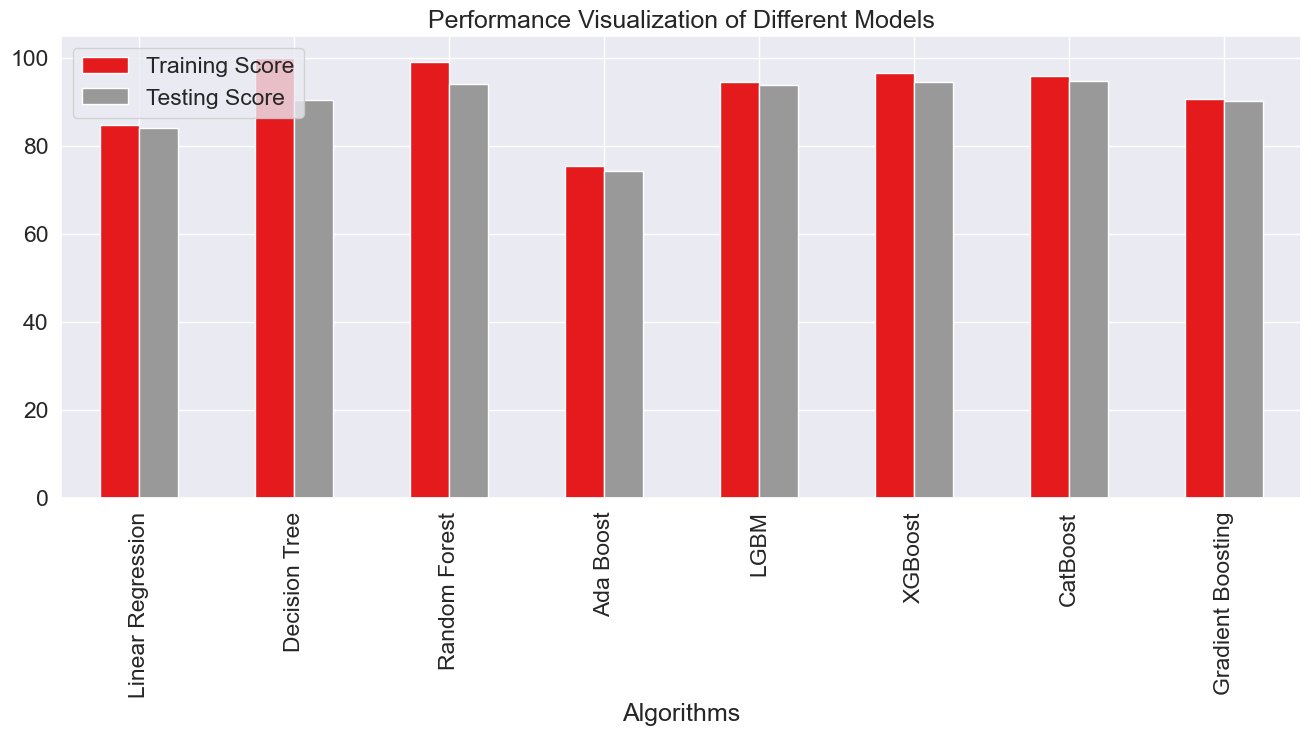

In [353]:
df_results.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()